# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (14)

## Clasificación con Árboles de decisión y Bosques Aleatorios  


### Ejemplo de la calidad del aire

En los últimos años, los **altos niveles de contaminación** durante ciertos periodos secos en **Madrid** ha obligado a las autoridades a tomar medidas contra el uso de automóviles en el centro de la ciudad, y ha sido utilizado como razón para **proponer modificaciones drásticas en el urbanismo de la ciudad**.

Gracias a la **web de [Datos Abiertos del Ayuntamiento de Madrid](https://datos.madrid.es/portal/site/egob/menuitem.400a817358ce98c34e937436a8a409a0/?vgnextoid=eba412b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextchannel=eba412b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default)**, los datos de calidad del aire están públicamente disponibles e incluyen **datos históricos diarios y horarios de los niveles registrados desde 2001 hasta 2018** y la lista de estaciones que se utilizan para el análisis de contaminación.

Vamos a utilizar **una muestra** que se ha preparado en base a estos datos que muestran la **calidad del aire** en varias estaciones de **Madrid** según diferentes variables.

In [ ]:
# importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Cargar los datos para el modelo

In [ ]:
# Cargar el dataset desde un archivo

df_aire = pd.read_excel("ABT_CALIDAD_AIRE.xlsx")

In [ ]:
# Consultar los registros del DataFrame
df_aire

,id_pto_calidad,nombre_estacion,ALTITUD,tipo_estacion_id,fecha,Calidad_NO2,Pto_trafico2,Pto_trafico1,Pto_trafico4,Pto_trafico5,...,chance_of_rain,will_it_snow,chance_of_snow,vis_km,festivo,anyo,mes,dia,hora,diasemana
0,4,Pza. de España,635,UT,01OCT17:00:00:00,77.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,0,1
1,4,Pza. de España,635,UT,01OCT17:01:00:00,34.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,1,1
2,4,Pza. de España,635,UT,01OCT17:02:00:00,26.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,2,1
3,4,Pza. de España,635,UT,01OCT17:03:00:00,18.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,3,1
4,4,Pza. de España,635,UT,01OCT17:04:00:00,12.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69616,47,Mendez Alvaro,599,UF,22FEB18:16:00:00,33.0,7004.0,4129.0,4127,7003,...,1,0,0,10.0,0,2018,2,22,16,5
69617,47,Mendez Alvaro,599,UF,22FEB18:17:00:00,28.0,7004.0,4129.0,4127,7003,...,1,0,0,10.0,0,2018,2,22,17,5
69618,47,Mendez Alvaro,599,UF,22FEB18:18:00:00,37.0,7004.0,4129.0,4127,7003,...,0,0,0,10.0,0,2018,2,22,18,5
69619,47,Mendez Alvaro,599,UF,22FEB18:19:00:00,49.0,7004.0,4129.0,4127,7003,...,1,0,0,10.0,0,2018,2,22,19,5


In [ ]:
# La información útil sobre los datos guardados en formato DataFrame
df_aire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69621 entries, 0 to 69620
Data columns (total 86 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_pto_calidad                69621 non-null  int64  
 1   nombre_estacion               69621 non-null  object 
 2   ALTITUD                       69621 non-null  int64  
 3   tipo_estacion_id              69621 non-null  object 
 4   fecha                         69621 non-null  object 
 5   Calidad_NO2                   69307 non-null  float64
 6   Pto_trafico2                  66741 non-null  float64
 7   Pto_trafico1                  66741 non-null  float64
 8   Pto_trafico4                  69621 non-null  int64  
 9   Pto_trafico5                  69621 non-null  int64  
 10  Pto_trafico3                  69621 non-null  int64  
 11  Distancia_Pto_trafico2        66741 non-null  float64
 12  Distancia_Pto_trafico1        66741 non-null  float64
 13  D

In [ ]:
# Consultamos los registros que tienen algún valor nulo
df_aire.drop(df_aire.dropna().index)

,id_pto_calidad,nombre_estacion,ALTITUD,tipo_estacion_id,fecha,Calidad_NO2,Pto_trafico2,Pto_trafico1,Pto_trafico4,Pto_trafico5,...,chance_of_rain,will_it_snow,chance_of_snow,vis_km,festivo,anyo,mes,dia,hora,diasemana
36,4,Pza. de España,635,UT,02OCT17:12:00:00,NaN,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,2,12,2
255,4,Pza. de España,635,UT,11OCT17:15:00:00,83.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,11,15,4
258,4,Pza. de España,635,UT,11OCT17:18:00:00,48.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,11,18,4
259,4,Pza. de España,635,UT,11OCT17:19:00:00,69.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,11,19,4
260,4,Pza. de España,635,UT,11OCT17:20:00:00,148.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,11,20,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68096,47,Mendez Alvaro,599,UF,21DEC17:08:00:00,66.0,7004.0,4129.0,4127,7003,...,1,0,0,10.0,0,2017,12,21,8,5
68391,47,Mendez Alvaro,599,UF,02JAN18:15:00:00,NaN,7004.0,4129.0,4127,7003,...,0,0,0,10.0,0,2018,1,2,15,3
68770,47,Mendez Alvaro,599,UF,18JAN18:10:00:00,NaN,7004.0,4129.0,4127,7003,...,1,0,0,10.0,0,2018,1,18,10,5
69058,47,Mendez Alvaro,599,UF,30JAN18:10:00:00,NaN,7004.0,4129.0,4127,7003,...,0,0,0,10.0,0,2018,1,30,10,3


Para evitar problemas posteriores, usamos el método ``dropna()`` para limpiar el tablón de valores perdidos (**missing values**) y reiniciamos el índice. Comprobamos la cantidad de las filas filtradas.

In [ ]:
df_air_filt = df_aire.dropna().reset_index(drop=True)
df_air_filt

,id_pto_calidad,nombre_estacion,ALTITUD,tipo_estacion_id,fecha,Calidad_NO2,Pto_trafico2,Pto_trafico1,Pto_trafico4,Pto_trafico5,...,chance_of_rain,will_it_snow,chance_of_snow,vis_km,festivo,anyo,mes,dia,hora,diasemana
0,4,Pza. de España,635,UT,01OCT17:00:00:00,77.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,0,1
1,4,Pza. de España,635,UT,01OCT17:01:00:00,34.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,1,1
2,4,Pza. de España,635,UT,01OCT17:02:00:00,26.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,2,1
3,4,Pza. de España,635,UT,01OCT17:03:00:00,18.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,3,1
4,4,Pza. de España,635,UT,01OCT17:04:00:00,12.0,3652.0,4316.0,4333,4336,...,0,0,0,10.0,0,2017,10,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,47,Mendez Alvaro,599,UF,22FEB18:16:00:00,33.0,7004.0,4129.0,4127,7003,...,1,0,0,10.0,0,2018,2,22,16,5
49250,47,Mendez Alvaro,599,UF,22FEB18:17:00:00,28.0,7004.0,4129.0,4127,7003,...,1,0,0,10.0,0,2018,2,22,17,5
49251,47,Mendez Alvaro,599,UF,22FEB18:18:00:00,37.0,7004.0,4129.0,4127,7003,...,0,0,0,10.0,0,2018,2,22,18,5
49252,47,Mendez Alvaro,599,UF,22FEB18:19:00:00,49.0,7004.0,4129.0,4127,7003,...,1,0,0,10.0,0,2018,2,22,19,5


### Tratamiento y Limpieza de datos

En la lista ``columnas_drop`` definimos las columnas a eliminar del dataset por ser meramente informativas.

In [ ]:
columnas_drop= ["Pto_trafico1",
                "Pto_trafico2",
                "Pto_trafico3",
                "Pto_trafico4",
                "Pto_trafico5",
                "Pto_trafico5",
                "anyo",
                "id_pto_calidad",
                "nombre_estacion",
                "tipo_estacion_id",
                "fecha"]

Creamos un nuevo dataset que sea como el tablón anterior, eliminando las columnas de la lista indicada. Utilizamos el método `drop` para _DataFrames_ de _pandas_.

In [ ]:
df_air_filt2 = df_air_filt.drop(columns=columnas_drop)
print("Tamaño del tablón filtrado: ", df_air_filt.shape)
print("Tamaño del tablón nuevo: ", df_air_filt2.shape)

Tamaño del tablón filtrado:  (49254, 86)
Tamaño del tablón nuevo:  (49254, 76)


In [ ]:
# La variable de dirección de viento que se requiere agrupar y posteriormente convertirse en números
df_air_filt2['wind_dir'].value_counts()

WSW    7982
SW     6616
NE     4130
W      3589
NNE    3480
WNW    3221
ENE    2924
SSW    2663
N      2313
NNW    2281
NW     2172
ESE    2039
E      2011
SE     1576
S      1284
SSE     973
Name: wind_dir, dtype: int64

In [ ]:
# Utilizamos estas listas como categorías para poder agruparlos posteriormente
norte = ['NNE','NNW','NE','N']
sur = ['SSE','SSW','SW','S']
este = ['ENE','ESE','SE','E']
oeste = ['WNW','WSW','NW','W']

In [ ]:
# Creamos un nuevo DataFrame con los datos agrupados
df_air_filt3 = df_air_filt2.copy()

# Modificamos directamente los valores del nuevo DataFrame (mediante inplace=True)
df_air_filt3['wind_dir'].replace(norte,"N", inplace=True)
df_air_filt3['wind_dir'].replace(sur,"S", inplace=True)
df_air_filt3['wind_dir'].replace(oeste,"O", inplace=True)
df_air_filt3['wind_dir'].replace(este,"E", inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
etiquetado = LabelEncoder()
etiquetado.fit(df_air_filt3['wind_dir'])

LabelEncoder()

In [ ]:
# Asignar una nueva columna
df_air_filt3['Dir_viento_etiquetado'] = etiquetado.transform(df_air_filt3['wind_dir'])

# mostrar la relación con el dato original
df_air_filt3.groupby(['wind_dir','Dir_viento_etiquetado']).count()[['mes']]

,,mes
wind_dir,Dir_viento_etiquetado,
E,0,8550
N,1,12204
O,2,16964
S,3,11536


In [ ]:
# Definimos un nuevo dataframe con solamente datos transformados a valores numéricos
df_air_filt4 = df_air_filt3.drop('wind_dir', axis='columns')

# Consultar el tipo de las variables
df_air_filt4.dtypes.value_counts()

float64    60
int64      15
int32       1
dtype: int64

#### **Reducción de Variables (_Dimensionality Reduction_)**


In [ ]:
# Importar el algoritmo de árboles de decisión y las métricas correspondientes
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Generar la lista de features y la variable target
target = 'Calidad_NO2'
features = [x for x in df_air_filt4.columns if x!=target]

# Asignar el algortimo e indicar la profundidad máxima del árbol (con un número rotandamente grande para sobreajustar)
arbol_importancia = DecisionTreeRegressor(max_depth=len(features)+10, random_state=100)

# Entrenar un árbol con todo el conjunto de datos
arbol_importancia.fit(X=df_air_filt4[features], y=df_air_filt4[target])

# Comprobamos que se obtiene un R^2 muy alto. Lo desesable es que sea 1.
y_pred_arbol = arbol_importancia.predict(X=df_air_filt4[features])

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(df_air_filt4[target], y_pred_arbol))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_air_filt4[target], y_pred_arbol)*100)
print('Mean Squared Error:', mean_squared_error(df_air_filt4[target], y_pred_arbol))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_air_filt4[target], y_pred_arbol)))
print('R^2 coefficient of determination:', r2_score(df_air_filt4[target], y_pred_arbol))

Mean Absolute Error: 0.0
Mean Absolute Percentage Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R^2 coefficient of determination: 1.0


El modelo consigue un rendimiento perfecto!! Ahora vamos a sacar **las variables más importantes** que ha detectado el modelo. El **árbol devuelve la importancia de cada una de ellas** en el orden en el que están las columnas en el dataframe.

In [ ]:
# Importancias de cada variable en el árbol ajustado (Gini importance)
arbol_importancia.feature_importances_

array([5.78163143e-03, 8.04938769e-04, 5.44098706e-03, 1.50786432e-03,
       2.66724686e-03, 1.16465757e-03, 7.67561386e-03, 3.18520872e-03,
       5.91213112e-03, 4.69569266e-03, 3.80539442e-03, 2.50096507e-03,
       2.84346300e-03, 4.79964557e-03, 2.23039688e-03, 4.40033948e-03,
       3.15211751e-03, 2.94962989e-03, 1.90435772e-02, 2.56158233e-03,
       2.48237387e-03, 4.70938083e-02, 4.11899693e-03, 2.98954622e-03,
       3.09670295e-03, 2.96708711e-03, 2.23720971e-03, 3.09501046e-04,
       2.96651661e-03, 3.48301914e-03, 3.08023789e-03, 4.61120403e-03,
       6.46565582e-03, 1.32903198e-02, 3.58631068e-03, 3.61907995e-03,
       5.01615807e-02, 3.43668346e-03, 3.97016144e-03, 1.58063078e-02,
       2.30510457e-03, 1.55769684e-03, 1.50244215e-03, 4.02858239e-03,
       1.49018634e-03, 0.00000000e+00, 2.78837747e-03, 2.89562350e-03,
       2.95020785e-03, 3.45650092e-03, 3.99469172e-03, 2.82719498e-03,
       6.95689753e-03, 7.90456687e-03, 2.17372165e-01, 2.14843538e-02,
      

Se observa que el método ``feature_importances_`` devuelve un array con la importancia en tanto por uno. Para asociarlos, podemos crear una serie con los índices de las variables y al lado la importancia.

In [ ]:
# Creamos un DataFrame con los datos de importancia
importancia = pd.DataFrame(arbol_importancia.feature_importances_, index=features, columns=["Importancia"])

# Ordenamos los datos
importancia.sort_values(by=importancia.columns[0], ascending=False, inplace=True)
importancia

,Importancia
wind_kph,0.217372
hora,0.176578
humidity,0.072744
Carga_mediaR3_750_1000,0.050162
Intensidad_mediaR6_2000,0.047094
...,...
Intensidad_minR6_2000,0.000310
will_it_rain,0.000020
will_it_snow,0.000000
chance_of_snow,0.000000


Podemos obtener una lista con **las variables que aglutinan el 95% de la información**. Procedemos a añadir al DataFrame "_importancia_" que hemos creado en el caso anterior **la columna `imp_acum` que acumule la suma**.

In [ ]:
importancia["imp_acum"] = importancia["Importancia"].cumsum()
importancia

,Importancia,imp_acum
wind_kph,0.217372,0.217372
hora,0.176578,0.393950
humidity,0.072744,0.466693
Carga_mediaR3_750_1000,0.050162,0.516855
Intensidad_mediaR6_2000,0.047094,0.563949
...,...,...
Intensidad_minR6_2000,0.000310,0.999980
will_it_rain,0.000020,1.000000
will_it_snow,0.000000,1.000000
chance_of_snow,0.000000,1.000000


In [ ]:
# Conjunto de variables más importantes
importancia.loc[importancia['imp_acum']<=0.95]

,Importancia,imp_acum
wind_kph,0.217372,0.217372
hora,0.176578,0.393950
humidity,0.072744,0.466693
Carga_mediaR3_750_1000,0.050162,0.516855
Intensidad_mediaR6_2000,0.047094,0.563949
dewpoint_c,0.040655,0.604604
dia,0.033287,0.637891
mes,0.029145,0.667036
pressure_mb,0.027457,0.694493
wind_degree,0.021484,0.715978


In [ ]:
# Definimos la lista de variables no tan importantes, cortando por el porcentaje de 85% de la información necesaria
variables = importancia.loc[importancia['imp_acum']>0.95].index.to_list()
print(variables)

['Intensidad_minR4_1000_1500', 'Intensidad_maxR1_500', 'Carga_maxR3_750_1000', 'Intensidad_mediaR2_500_750', 'Carga_maxR2_500_750', 'Carga_Pto_trafico1', 'Carga_maxR6_2000', 'Carga_maxR1_500', 'Distancia_Pto_trafico5', 'Intensidad_mediaR4_1000_1500', 'Carga_Pto_trafico2', 'Intensidad_mediaR5_1500_2000', 'Carga_minR1_500', 'Intensidad_minR5_1500_2000', 'Carga_Pto_trafico5', 'vis_km', 'Carga_minR2_500_750', 'Distancia_Pto_trafico4', 'Carga_minR3_750_1000', 'Carga_minR5_1500_2000', 'Distancia_Pto_trafico3', 'chance_of_rain', 'Distancia_Pto_trafico2', 'festivo', 'Intensidad_minR6_2000', 'will_it_rain', 'will_it_snow', 'chance_of_snow', 'Carga_minR6_2000']


In [ ]:
print("Variables iniciales: ", len(features))
print("Variables no importantes (a eliminar): ", len(variables))

Variables iniciales:  75
Variables no importantes (a eliminar):  29


Ahora podemos filtrar el tablón para quedarnos solamente con las variables más importantes.

In [ ]:
df_air_filt5 = df_air_filt4.drop(labels=variables, axis='columns')
df_air_filt5

,ALTITUD,Calidad_NO2,Distancia_Pto_trafico1,Intensidad_Pto_trafico1,Intensidad_Pto_trafico2,Intensidad_Pto_trafico3,Intensidad_Pto_trafico4,Intensidad_Pto_trafico5,Carga_Pto_trafico4,Carga_Pto_trafico3,...,cloud,feelslike_c,windchill_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado
0,635,77.0,60.589582,154.00,697.00,259.00,847.00,845.00,46.00,6.00,...,0,21.0,21.0,21.0,10.9,10,1,0,1,1
1,635,34.0,60.589582,159.00,753.00,282.00,854.00,929.00,48.00,8.00,...,0,20.6,20.6,20.6,11.1,10,1,1,1,1
2,635,26.0,60.589582,111.00,851.00,235.00,678.00,1056.00,41.00,5.00,...,0,20.1,20.1,20.1,11.2,10,1,2,1,1
3,635,18.0,60.589582,70.00,557.00,150.00,511.00,719.00,33.00,4.00,...,0,19.7,19.7,19.7,11.4,10,1,3,1,1
4,635,12.0,60.589582,66.00,532.00,167.00,439.00,632.00,25.00,5.00,...,11,19.5,19.5,19.5,11.2,10,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,599,33.0,323.225854,521.75,882.50,1427.00,113.75,1166.50,14.25,45.50,...,5,11.0,11.0,12.1,-7.0,2,22,16,5,1
49250,599,28.0,323.225854,497.00,1001.75,1413.75,135.00,1144.25,18.25,45.75,...,5,9.4,9.4,11.0,-6.6,2,22,17,5,1
49251,599,37.0,323.225854,559.75,1085.75,1487.50,138.25,1206.25,20.00,48.25,...,5,7.7,7.7,9.8,-6.2,2,22,18,5,1
49252,599,49.0,323.225854,518.50,1024.75,1535.75,139.00,1224.25,19.25,49.75,...,5,6.6,6.6,8.8,-5.9,2,22,19,5,3


### Planteamiento del ejercicio de clasificación

Vamos a crear una variable objetivo de nombre ***Escenario*** con 2 clases como 0,1 del modo que:  

* El **nivel 0** se corresponda a los valores **por debajo del percentil 25 o el primer cuartil (Q1)** de la variable _target_ (`Calidad_NO2`).    
* El **nivel 1** se corresponde a los valores **por encima del percentil 25 o el primer cuartil (Q1)**.  

Eliminamos después la columna `Calidad_NO2` del nuevo dataset y procedemos a dividir el datset en conjuntos de train y test (usualmente con un reparto de 80% - 20%).  

**Vamos a intentar predecir si la calidad de aire de las distintas zonas está en el nivel 0, 1.**


In [ ]:
# Hacemos una copia del tablón filtrado para no trabajar sobre original
df_aire_calidad = df_air_filt5.copy()

In [ ]:
# Crear la columna nueva "Escenario" y borrar la columna target antigua 'Calidad_NO2'
df_aire_calidad["Escenario"] = np.where(df_aire_calidad['Calidad_NO2']<df_aire_calidad['Calidad_NO2'].quantile(0.25),0,1)

df_aire_calidad.drop(['Calidad_NO2'], axis='columns', inplace=True)
df_aire_calidad

,ALTITUD,Distancia_Pto_trafico1,Intensidad_Pto_trafico1,Intensidad_Pto_trafico2,Intensidad_Pto_trafico3,Intensidad_Pto_trafico4,Intensidad_Pto_trafico5,Carga_Pto_trafico4,Carga_Pto_trafico3,Intensidad_mediaR1_500,...,feelslike_c,windchill_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado,Escenario
0,635,60.589582,154.00,697.00,259.00,847.00,845.00,46.00,6.00,493.727273,...,21.0,21.0,21.0,10.9,10,1,0,1,1,1
1,635,60.589582,159.00,753.00,282.00,854.00,929.00,48.00,8.00,500.659091,...,20.6,20.6,20.6,11.1,10,1,1,1,1,1
2,635,60.589582,111.00,851.00,235.00,678.00,1056.00,41.00,5.00,458.159091,...,20.1,20.1,20.1,11.2,10,1,2,1,1,1
3,635,60.589582,70.00,557.00,150.00,511.00,719.00,33.00,4.00,338.454545,...,19.7,19.7,19.7,11.4,10,1,3,1,1,0
4,635,60.589582,66.00,532.00,167.00,439.00,632.00,25.00,5.00,282.681818,...,19.5,19.5,19.5,11.2,10,1,4,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,599,323.225854,521.75,882.50,1427.00,113.75,1166.50,14.25,45.50,601.100000,...,11.0,11.0,12.1,-7.0,2,22,16,5,1,1
49250,599,323.225854,497.00,1001.75,1413.75,135.00,1144.25,18.25,45.75,641.575000,...,9.4,9.4,11.0,-6.6,2,22,17,5,1,1
49251,599,323.225854,559.75,1085.75,1487.50,138.25,1206.25,20.00,48.25,699.375000,...,7.7,7.7,9.8,-6.2,2,22,18,5,1,1
49252,599,323.225854,518.50,1024.75,1535.75,139.00,1224.25,19.25,49.75,673.100000,...,6.6,6.6,8.8,-5.9,2,22,19,5,3,1


In [ ]:
df_aire_calidad.describe()

,ALTITUD,Distancia_Pto_trafico1,Intensidad_Pto_trafico1,Intensidad_Pto_trafico2,Intensidad_Pto_trafico3,Intensidad_Pto_trafico4,Intensidad_Pto_trafico5,Carga_Pto_trafico4,Carga_Pto_trafico3,Intensidad_mediaR1_500,...,feelslike_c,windchill_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado,Escenario
count,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,...,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000,49254.000000
mean,661.735027,140.003163,348.427424,307.270861,465.780060,396.266552,415.983267,24.459218,19.582406,388.981257,...,10.142878,10.158558,11.595022,2.455007,5.857250,15.798656,11.479433,3.972429,1.639258,0.759857
std,34.497321,98.958425,385.365535,311.674022,781.171063,363.917301,395.422520,18.969057,17.162813,304.860574,...,7.045263,7.096225,6.109079,4.533624,4.334602,8.726627,6.935243,2.008118,1.022857,0.427174
min,599.000000,48.351595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000,...,-2.600000,-2.600000,0.300000,-11.700000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,635.000000,71.219285,61.500000,71.000000,89.250000,84.000000,72.750000,8.000000,6.000000,146.391667,...,4.800000,4.800000,7.100000,-0.800000,2.000000,8.000000,5.000000,2.000000,1.000000,1.000000
50%,670.000000,86.018742,208.750000,193.000000,269.000000,276.875000,309.000000,20.000000,14.250000,326.584350,...,8.700000,8.700000,10.300000,2.400000,4.000000,16.000000,11.000000,4.000000,2.000000,1.000000
75%,693.000000,168.527832,476.750000,446.500000,669.750000,649.000000,647.000000,38.250000,29.000000,560.473438,...,14.500000,14.500000,14.700000,5.800000,11.000000,23.000000,17.000000,6.000000,2.000000,1.000000
max,708.000000,407.571507,2844.250000,1950.000000,30660.000000,3121.750000,2307.000000,100.000000,100.000000,2632.795833,...,31.400000,33.500000,31.400000,16.500000,12.000000,31.000000,23.000000,7.000000,3.000000,1.000000


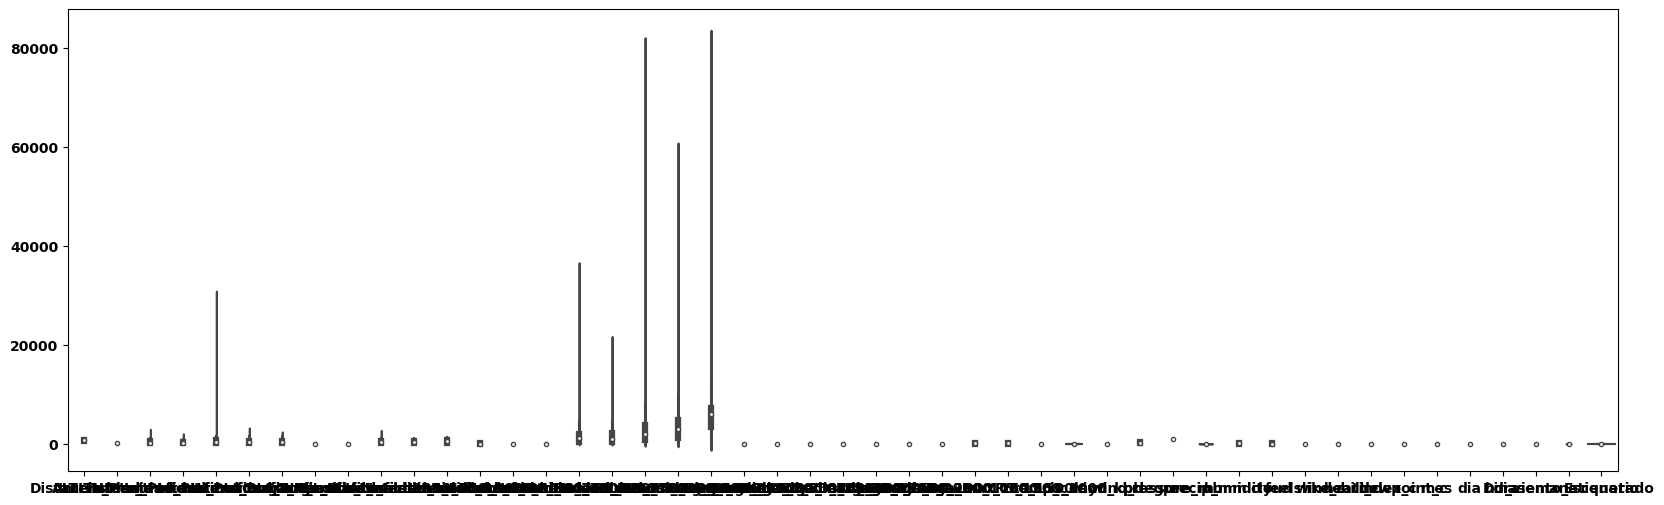

In [ ]:
# Graficar la distribución de los valores originales
plt.figure(figsize=(20,6))
sns.violinplot(data=df_aire_calidad, orient='v')
plt.show()

In [ ]:
## Preparar el conjunto de datos del modelo

# Variables independientes (features)
X = df_aire_calidad.drop('Escenario', axis='columns')

# Variable dependiente (target) que son los niveles de aire con menos contaminación
y = df_aire_calidad['Escenario']

Se puede observar la necesidad de llevar todas las variables de entrada a una escala estándar.

In [ ]:
# importar los objetos necesarios de la librería sklearn
from sklearn.preprocessing import MinMaxScaler

# declarar el tipo de escalamiento y aplicarlo al conjunto de datos
escalado = MinMaxScaler().fit(X)
dataset_normal = escalado.transform(X)
dataset_normal

array([[0.33027523, 0.03406823, 0.05414433, ..., 0.        , 0.        ,
        0.33333333],
       [0.33027523, 0.03406823, 0.05590226, ..., 0.04347826, 0.        ,
        0.33333333],
       [0.33027523, 0.03406823, 0.03902611, ..., 0.08695652, 0.        ,
        0.33333333],
       ...,
       [0.        , 0.76519772, 0.19680056, ..., 0.7826087 , 0.66666667,
        0.33333333],
       [0.        , 0.76519772, 0.18229762, ..., 0.82608696, 0.66666667,
        1.        ],
       [0.        , 0.76519772, 0.16603674, ..., 0.86956522, 0.66666667,
        0.        ]])

In [ ]:
# Lo convertimos en un DataFrame, añadiendole sus etiquetas
X_normal = pd.DataFrame(dataset_normal, columns=X.columns)
print(type(X_normal))
X_normal

<class 'pandas.core.frame.DataFrame'>


,ALTITUD,Distancia_Pto_trafico1,Intensidad_Pto_trafico1,Intensidad_Pto_trafico2,Intensidad_Pto_trafico3,Intensidad_Pto_trafico4,Intensidad_Pto_trafico5,Carga_Pto_trafico4,Carga_Pto_trafico3,Intensidad_mediaR1_500,...,cloud,feelslike_c,windchill_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado
0,0.330275,0.034068,0.054144,0.357436,0.008447,0.271322,0.366277,0.4600,0.0600,0.186757,...,0.00,0.694118,0.653740,0.665595,0.801418,0.818182,0.0,0.000000,0.000000,0.333333
1,0.330275,0.034068,0.055902,0.386154,0.009198,0.273565,0.402687,0.4800,0.0800,0.189393,...,0.00,0.682353,0.642659,0.652733,0.808511,0.818182,0.0,0.043478,0.000000,0.333333
2,0.330275,0.034068,0.039026,0.436410,0.007665,0.217186,0.457737,0.4100,0.0500,0.173235,...,0.00,0.667647,0.628809,0.636656,0.812057,0.818182,0.0,0.086957,0.000000,0.333333
3,0.330275,0.034068,0.024611,0.285641,0.004892,0.163690,0.311660,0.3300,0.0400,0.127725,...,0.00,0.655882,0.617729,0.623794,0.819149,0.818182,0.0,0.130435,0.000000,0.333333
4,0.330275,0.034068,0.023205,0.272821,0.005447,0.140626,0.273949,0.2500,0.0500,0.106521,...,0.11,0.650000,0.612188,0.617363,0.812057,0.818182,0.0,0.173913,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49249,0.000000,0.765198,0.183440,0.452564,0.046543,0.036438,0.505635,0.1425,0.4550,0.227579,...,0.05,0.400000,0.376731,0.379421,0.166667,0.090909,0.7,0.695652,0.666667,0.333333
49250,0.000000,0.765198,0.174739,0.513718,0.046111,0.043245,0.495990,0.1825,0.4575,0.242967,...,0.05,0.352941,0.332410,0.344051,0.180851,0.090909,0.7,0.739130,0.666667,0.333333
49251,0.000000,0.765198,0.196801,0.556795,0.048516,0.044286,0.522865,0.2000,0.4825,0.264942,...,0.05,0.302941,0.285319,0.305466,0.195035,0.090909,0.7,0.782609,0.666667,0.333333
49252,0.000000,0.765198,0.182298,0.525513,0.050090,0.044526,0.530668,0.1925,0.4975,0.254952,...,0.05,0.270588,0.254848,0.273312,0.205674,0.090909,0.7,0.826087,0.666667,1.000000


In [ ]:
X_normal.describe().round(4)

,ALTITUD,Distancia_Pto_trafico1,Intensidad_Pto_trafico1,Intensidad_Pto_trafico2,Intensidad_Pto_trafico3,Intensidad_Pto_trafico4,Intensidad_Pto_trafico5,Carga_Pto_trafico4,Carga_Pto_trafico3,Intensidad_mediaR1_500,...,cloud,feelslike_c,windchill_c,heatindex_c,dewpoint_c,mes,dia,hora,diasemana,Dir_viento_etiquetado
count,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,...,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000,49254.0000
mean,0.5756,0.2551,0.1225,0.1576,0.0152,0.1269,0.1803,0.2446,0.1958,0.1469,...,0.3238,0.3748,0.3534,0.3632,0.5020,0.4416,0.4933,0.4991,0.4954,0.5464
std,0.3165,0.2755,0.1355,0.1598,0.0255,0.1166,0.1714,0.1897,0.1716,0.1159,...,0.3392,0.2072,0.1966,0.1964,0.1608,0.3941,0.2909,0.3015,0.3347,0.3410
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.3303,0.0637,0.0216,0.0364,0.0029,0.0269,0.0315,0.0800,0.0600,0.0547,...,0.0300,0.2176,0.2050,0.2186,0.3865,0.0909,0.2333,0.2174,0.1667,0.3333
50%,0.6514,0.1049,0.0734,0.0990,0.0088,0.0887,0.1339,0.2000,0.1425,0.1232,...,0.1800,0.3324,0.3130,0.3215,0.5000,0.2727,0.5000,0.4783,0.5000,0.6667
75%,0.8624,0.3345,0.1676,0.2290,0.0218,0.2079,0.2805,0.3825,0.2900,0.2121,...,0.6100,0.5029,0.4737,0.4630,0.6206,0.9091,0.7333,0.7391,0.8333,0.6667
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


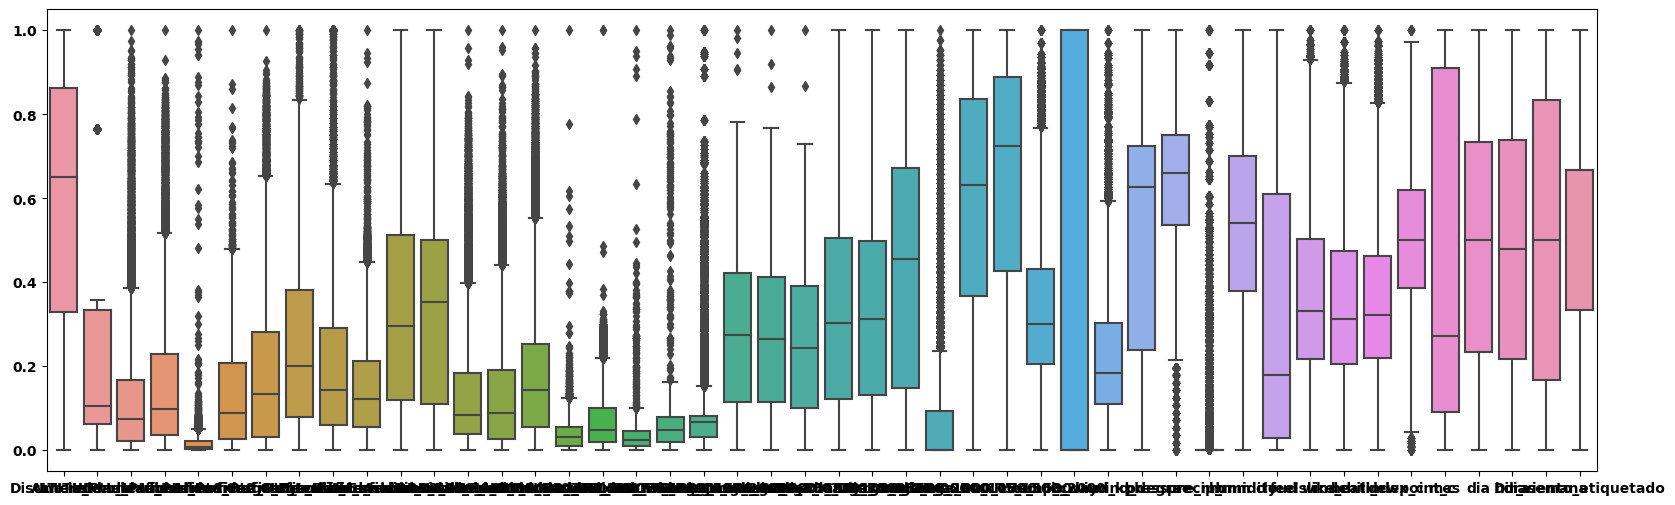

In [ ]:
# Graficar la distribución de los valores estandarizados
plt.figure(figsize=(20,6))
sns.boxplot(data=X_normal,  orient='v')
plt.show()

### **Paso 2.**  Dividir el dataset en Training y Test set

In [ ]:
# Separar los conjuntos de datos de entrenamiento (Training) y de prueba (Test) para las variables de entrada y salida
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=88)

In [ ]:
# "test_size" representa la proporción del conjunto de datos a incluir en la división de Test
print(X_train.shape[0])
print(X_test.shape[0])
X_train.shape[0] + X_test.shape[0]

39403
9851


49254

#### **Paso 3.** Cargar y elegir el modelo de regresión logística

In [ ]:
# Importar el módulo que corresponde al algoritmo
from sklearn.linear_model import LogisticRegression

# Asignar el algoritmo que vamos a aplicar
log_r = LogisticRegression(max_iter=1000,
                           random_state=100)

### **Paso 4.** Entrenar el modelo de regresión logística con los datos de entrenamiento

In [ ]:
# Entrenar el modelo
log_r.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=100)

Ahora que el modelo está entrenado, sacamos las predicciones, analizamos los resultados y obtenemos algunas métricas del modelo basadas en el conjunto de datos de prueba. Según las métricas, podremos observar si el modelo clasificó correctamente todas las especies.

### **Paso 5.** Obtener las predicciones

In [ ]:
# Calcular las predicciones con el conjunto de prueba
y_pred = log_r.predict(X_test)

In [ ]:
# Imprimir la salida del modelo (los niveles de calidad del aire)
print(y_pred)

[1 1 1 ... 1 1 1]


### **Paso 6.** Evaluación del modelo a través de sus métricas

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8402192670794844

Existen otra serie de metricas para calificar los modelos de clasificación que se detallan a continuación. Algunas de estas medidas se resumen en un informe llamado **classification_report**.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.54      0.62      2404
           1       0.86      0.94      0.90      7447

    accuracy                           0.84      9851
   macro avg       0.80      0.74      0.76      9851
weighted avg       0.83      0.84      0.83      9851



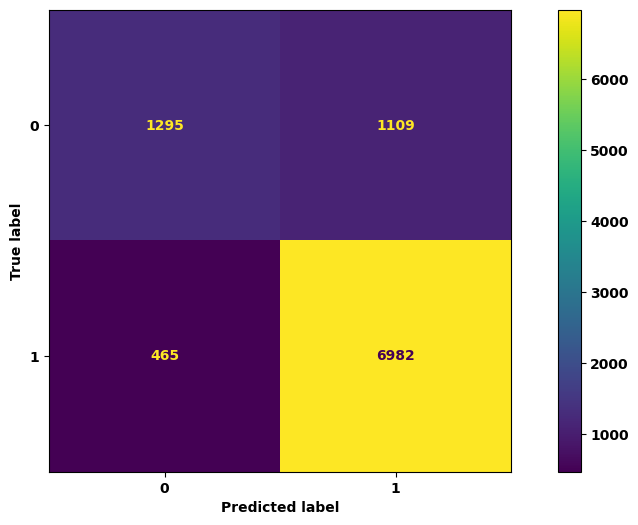

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=log_r.classes_)
disp.plot()

plt.show()

In [ ]:
# Calcular el área bajo la curva de funcionamiento del receptor
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7381221363078903

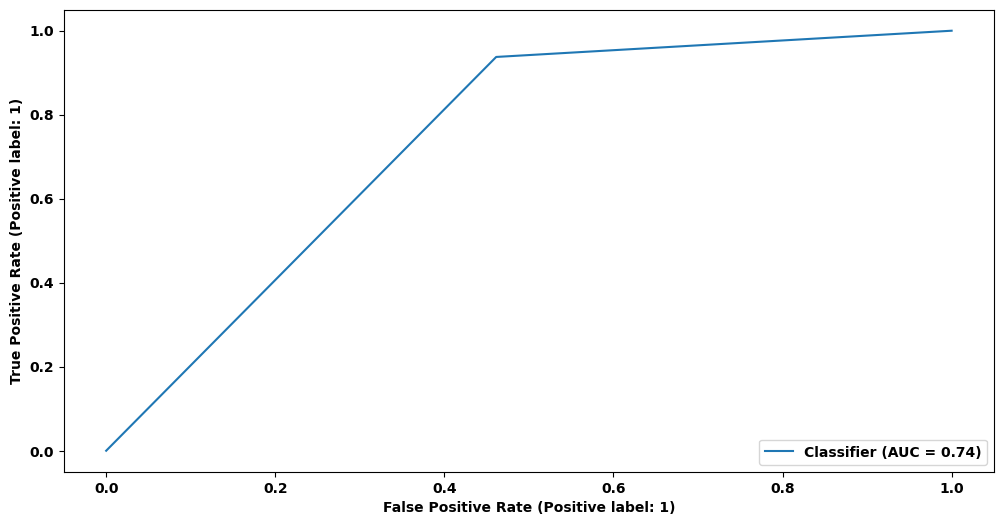

In [ ]:
# Graficar la curva ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred)

plt.show()

---

## Clasificadores basados en Árboles de decisión (_Decision Tree Classifires_)

![image.png](attachment:image.png)

Un árbol de decisión es un modelo predictivo que **divide el espacio de los predictores agrupando observaciones con valores similares para la variable respuesta**.

Para dividir el espacio muestral en sub-regiones es preciso aplicar una serie de reglas o decisiones, para que cada sub-región contenga la mayor proporción posible de individuos de una de las poblaciones. Si una sub-región contiene datos de diferentes clases, se subdivide en regiones más pequeñas hasta fragmentar el espacio en sub-regiones menores que integran datos de la misma clase.

El tipo de problema a resolver dependerá de la variable a predecir:
* Variable continua: estaríamos ante un problema de regresión.
* Variable __categórica__: nos enfrentaríamos a un problema de __clasificación__

Vamos a entrenar un **modelo de clasificación de la calidad del aire** con `árboles de decisión`.


In [ ]:
from sklearn.tree import DecisionTreeClassifier

arbol_clas = DecisionTreeClassifier(random_state=100)

# Ajustamos el algoritmo al conjunto de datos de entrenamiento
arbol_clas.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_arbol = arbol_clas.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_arbol)

0.8689473149934017

In [ ]:
# Score:  Accuracy que representa el porcentaje de los aciertos en total
print("Aciertos en entrenamiento:", arbol_clas.score(X_train,y_train))
print("Aciertos prueba (test):", arbol_clas.score(X_test,y_test))

Aciertos en entrenamiento: 1.0
Aciertos prueba (test): 0.8689473149934017


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_arbol))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73      2404
           1       0.91      0.91      0.91      7447

    accuracy                           0.87      9851
   macro avg       0.82      0.82      0.82      9851
weighted avg       0.87      0.87      0.87      9851



In [ ]:
# Calcular el área bajo la curva de funcionamiento del receptor
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_arbol)

0.8240247164264742

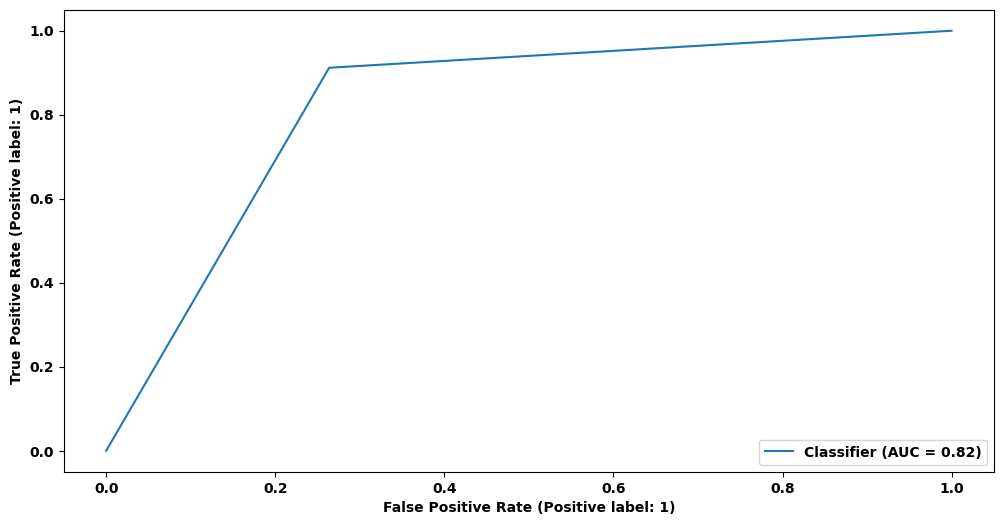

In [ ]:
# Graficar la curva ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_arbol)

plt.show()

Vamos a obtener más información acerca del árbol de decisión del modelo usando las siguientes funciones:

In [ ]:
# Parámetros indicados en la definicón del árbol
arbol_clas.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 100,
 'splitter': 'best'}

In [ ]:
print("La profundidad del árbol:", arbol_clas.get_depth())
print("El número de hojas del árbol:", arbol_clas.get_n_leaves())

La profundidad del árbol: 30
El número de hojas del árbol: 2753


Para visualizar el proceso de los árboles de regresión podemos utilizar lo siguente:

In [ ]:
from sklearn import tree
arbol_texto = tree.export_text(arbol_clas)
print(arbol_texto)

|--- feature_10 <= 0.26
|   |--- feature_31 <= 0.18
|   |   |--- feature_21 <= 0.08
|   |   |   |--- feature_32 <= 0.63
|   |   |   |   |--- feature_31 <= 0.09
|   |   |   |   |   |--- feature_41 <= 0.55
|   |   |   |   |   |   |--- feature_25 <= 0.06
|   |   |   |   |   |   |   |--- feature_39 <= 0.14
|   |   |   |   |   |   |   |   |--- feature_25 <= 0.02
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_25 >  0.02
|   |   |   |   |   |   |   |   |   |--- feature_24 <= 0.01
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- feature_24 >  0.01
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_39 >  0.14
|   |   |   |   |   |   |   |   |--- feature_39 <= 0.23
|   |   |   |   |   |   |   |   |   |--- feature_28 <= 0.08
|   |   |   |   |   |   |   |   |   |   |--- feature_27 <= 0.07
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth

In [ ]:
# Los features son las variables que se nombran en cada column
X_train.columns

Index(['ALTITUD', 'Distancia_Pto_trafico1', 'Intensidad_Pto_trafico1',
       'Intensidad_Pto_trafico2', 'Intensidad_Pto_trafico3',
       'Intensidad_Pto_trafico4', 'Intensidad_Pto_trafico5',
       'Carga_Pto_trafico4', 'Carga_Pto_trafico3', 'Intensidad_mediaR1_500',
       'Intensidad_mediaR3_750_1000', 'Intensidad_mediaR6_2000',
       'Intensidad_minR1_500', 'Intensidad_minR2_500_750',
       'Intensidad_minR3_750_1000', 'Intensidad_maxR2_500_750',
       'Intensidad_maxR3_750_1000', 'Intensidad_maxR4_1000_1500',
       'Intensidad_maxR5_1500_2000', 'Intensidad_maxR6_2000',
       'Carga_mediaR1_500', 'Carga_mediaR2_500_750', 'Carga_mediaR3_750_1000',
       'Carga_mediaR4_1000_1500', 'Carga_mediaR5_1500_2000',
       'Carga_mediaR6_2000', 'Carga_minR4_1000_1500', 'Carga_maxR4_1000_1500',
       'Carga_maxR5_1500_2000', 'temp_c', 'is_day', 'wind_kph', 'wind_degree',
       'pressure_mb', 'precip_mm', 'humidity', 'cloud', 'feelslike_c',
       'windchill_c', 'heatindex_c', 'dewpoin

### Curva de complejidad del modelo Decision Tree (**Model Complexity Curve**)

El mejor valor de max_depth podría ser = 11  que consigue un Accuracy = 0.8772713430108618


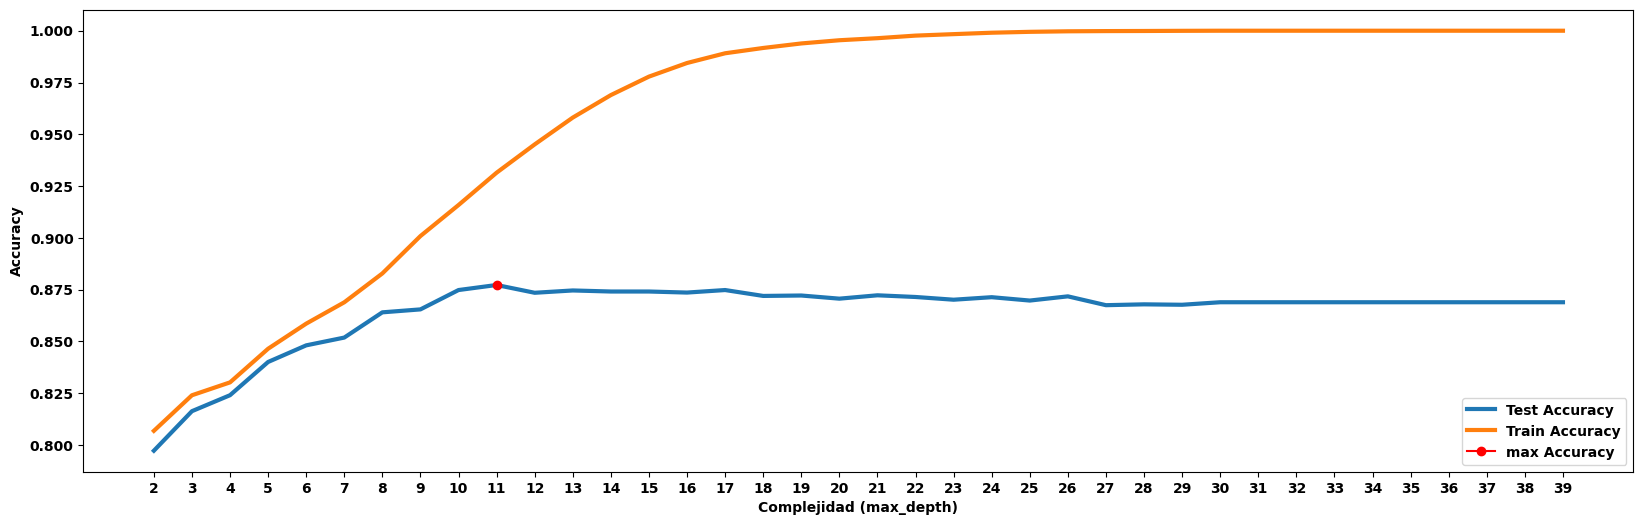

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Consideramos un rango para asignar el hiperparámetro
hiper_param = np.arange(2,40)

# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los árboles
train_score = np.zeros(hiper_param.size)
test_score = np.zeros(hiper_param.size)

for i in range(hiper_param.size):
    # Generamos un árbol para cada hiperparámetro, lo entrenamos y calculamos el rendimiento sobre datos de train y de test
    mod_arbol = DecisionTreeClassifier(max_depth=hiper_param[i], random_state=100)
    mod_arbol.fit(X_train, y_train)
    train_score[i] = accuracy_score(y_train, mod_arbol.predict(X_train))
    test_score[i] = accuracy_score(y_test, mod_arbol.predict(X_test))

print("El mejor valor de max_depth podría ser =", hiper_param[np.argmax(test_score)],
      " que consigue un Accuracy =", max(test_score))


# Graficamos el rendimiento de training versus de test
plt.figure(figsize=(20,6))
plt.plot(hiper_param, test_score, linewidth=3, label='Test Accuracy')
plt.plot(hiper_param, train_score, linewidth=3, label='Train Accuracy')
plt.plot(hiper_param[np.argmax(test_score)], max(test_score),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param)
plt.xlabel('Complejidad (max_depth)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
arbol_opt = DecisionTreeClassifier(max_depth=11,
                                   random_state=100)

# Ajustamos el algoritmo al conjunto de datos de entrenamiento
arbol_opt.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_arbol_opt = arbol_opt.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_arbol_opt)

0.8772713430108618

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_arbol_opt))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      2404
           1       0.92      0.92      0.92      7447

    accuracy                           0.88      9851
   macro avg       0.83      0.84      0.83      9851
weighted avg       0.88      0.88      0.88      9851



In [ ]:
# Calcular el área bajo la curva de funcionamiento del receptor
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_arbol_opt)

0.8365725670500824

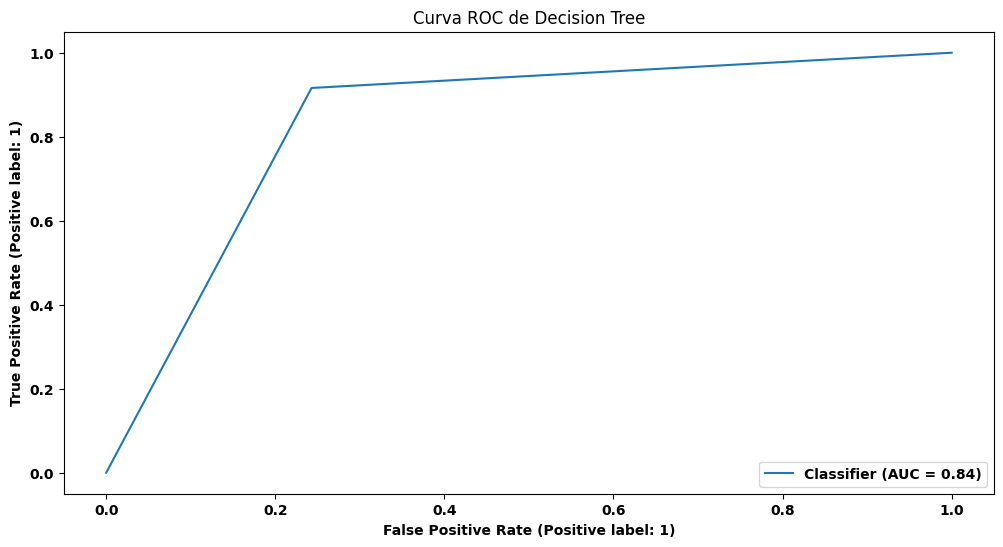

In [ ]:
# Graficar la curva ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_arbol_opt)
plt.title("Curva ROC de Decision Tree")
plt.show()

### Curva de aprendizaje (**Learning Curve**)

Definimos una función que toma el valor del hiperparámetro como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test:

In [ ]:
def curva_aprendizaje_arbol(profundidad: int=None):
    """Función para sacar la gráfica de Learning Curve a partir de la profundidad del árbol"""

    # Se toma el valor entero y si no se indica nada por defecto se pasa el None como la profundidad máxima
    if profundidad:
        hiper_parametro = int(profundidad)
    else:
        hiper_parametro = None

    # Generar la estructura del árbol
    modelo_arbol = DecisionTreeClassifier(max_depth=hiper_parametro, random_state=100)

    # Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
    num_samples = np.linspace(100,X_train.shape[0],100).astype(int)

    # Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los árboles
    train_score = np.zeros(num_samples.size)
    test_score = np.zeros(num_samples.size)

    for i in range(num_samples.size):
        # Generamos un árbol para cada subconjunto de datos de entrenamiento y lo ajustamos
        modelo_arbol.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

        # Calculamos el área bajo la curva de funcionamiento del receptor sobre datos de train y de test
        train_score[i] = accuracy_score(y_train[:num_samples[i]], modelo_arbol.predict(X_train[:num_samples[i]]))
        test_score[i] = accuracy_score(y_test, modelo_arbol.predict(X_test))

    print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

    # Graficamos el rendimiento de training versus de test
    plt.plot(num_samples, test_score, label = 'Test Accuracy')
    plt.plot(num_samples, train_score, label = 'Train Accuracy')
    plt.title('Curva de aprendizaje (Learning Curve) para la profundidad = %s' % hiper_parametro)
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right')
    plt.show()


Primero graficamos la curva de aprendizaje para la profundidad por defecto (***max_depth=None***)

La diferencia final del rendimiento del modelo entre training y test es=  0.13105268500659828


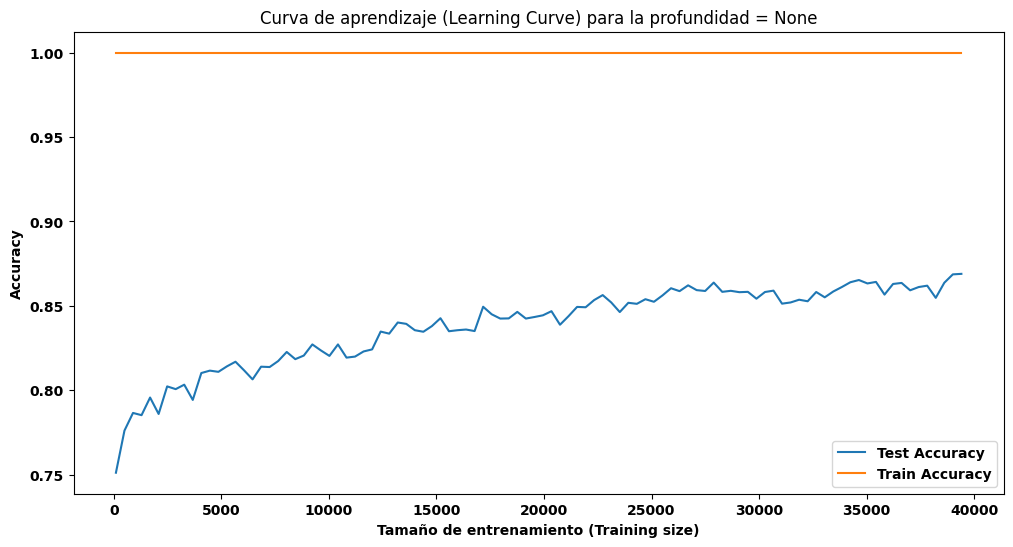

In [ ]:
curva_aprendizaje_arbol()

Ahora consultamos la forma de _Learning Curve_ para la profundidad máxima con el mejor rendimiento sacado antes del _Complexity Curve_ (***max_depth=11***)

La diferencia final del rendimiento del modelo entre training y test es=  0.05420595567197961


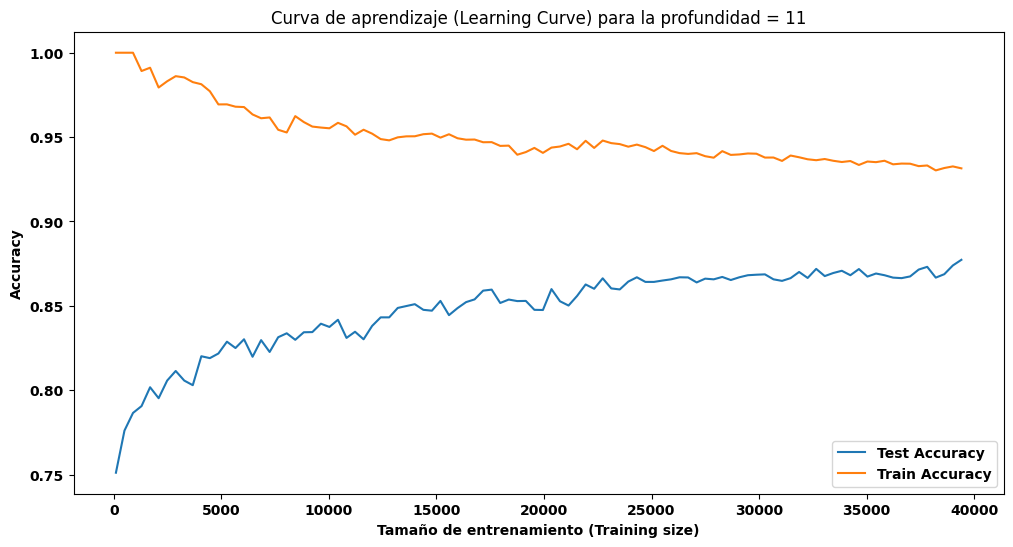

In [ ]:
curva_aprendizaje_arbol(profundidad=11)

---

### **`Ejercicio 14.1`**

**`14.1.1`** Realiza una búsqueda del valor de hiperparámetro y el modelo óptimo usando la técnica de *Grid Search* para el rango indicado de profundidades y compáralo con el valor sugerido anteriormente en la sesión.
- rango de profundidades:  de `0` a `20` __no inclusive__   
- para `KFold`  >>> `n_splits=10` y `random_state=111`  
- para `GridSearchCV`  >>> `random_state=100`  
- para scoring:  `el área bajo la curva de funcionamiento del receptor`   

**`14.1.2`** Calcula diferentes métricas para evaluar tu modelo y analiza su rendimiendo en comparación con modelos anteriores.
- Accuracy
- Classification report
- Confusion matrix
- AUC
- ROC (Curve)

**`14.1.3`** Saca la gráfica de el *Learning Curve* para el modelo óptimo, usando la función definida en la sesión y explica si este modelo tiene preferencia o no, comparando con modelos anteriores.

Aquí realizamos la búsqueda con un rango amplio de profundidades para el árbol que vamos a ajustar, haciendo un *10-fold cross-validation* de los datos de entrenamiento:

In [ ]:
## Solución
# Ejercicio 14.1.1
profundidades=np.arange(0,20,1)
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# Definimos la menra de trozear dataset de train para crear los subconjuntos que se utilizan en la validación cruzada (Cross-Validation)
folds = KFold(n_splits=10, shuffle=True, random_state=111)

# Declaramos el tipo de regresor (modelo) y los rangos de hiperparámetros a considerar en la búsqueda
modelo =  DecisionTreeClassifier (random_state=100)
parametros ={'max_depth':profundidades}
# Establecer el R_cuadrado como la función de "scoring" a la hora de puntuar los modelos
scoreFun = make_scorer(r2_score )

# Definir el Grid Search y realizar la búsqueda con los datos de entrenamiento
modelo_grid = GridSearchCV(estimator=modelo,
                          param_grid=parametros,
                          scoring=scoreFun,
                          cv=folds,
                          n_jobs=-1)
modelo_grid.fit(X_train, y_train)

c:\Users\wonderwoman\anaconda3\envs\recomendadorVideos\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\wonderwoman\anaconda3\envs\recomendadorVideos\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\wonderwoman\anaconda3\envs\recomendadorVideos\lib\site-packages\sklearn\tree\_classes.py", line 969, in fit
    super().fit(
  File "c:\Users\wonderwoman\anaconda3\envs\recomendadorVideos\lib\site-packages\sklearn\tree\_classes.py",

GridSearchCV(cv=KFold(n_splits=10, random_state=111, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=100), n_jobs=-1,
             param_grid={'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])},
             scoring=make_scorer(r2_score))

Acurrenci Score 0.9129022434270633
AU 0.851829215977042
Confusion Matrix


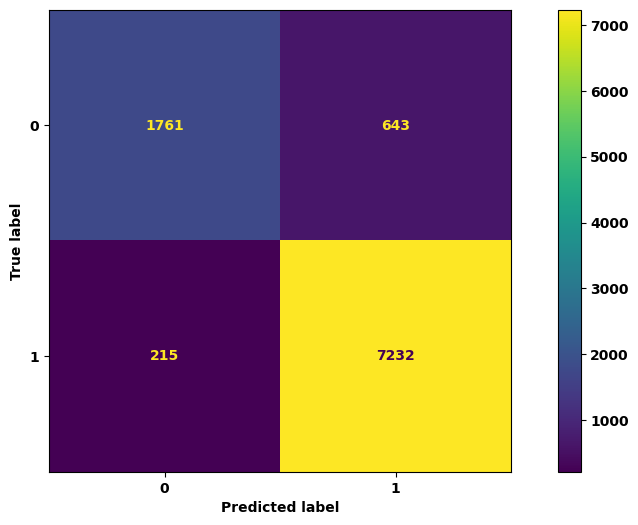

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      2404
           1       0.92      0.97      0.94      7447

    accuracy                           0.91      9851
   macro avg       0.90      0.85      0.87      9851
weighted avg       0.91      0.91      0.91      9851

Curve


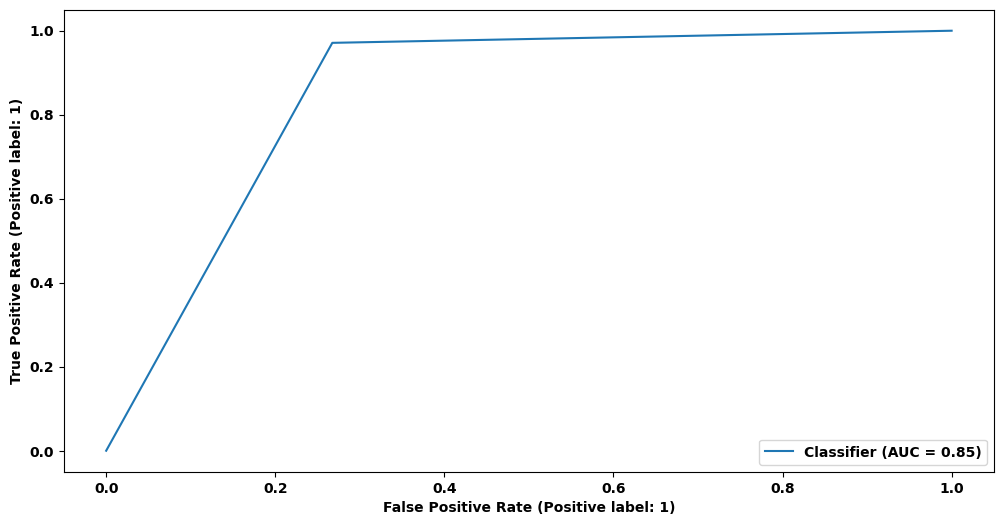

In [ ]:
## Solución
# Ejercicio 14.1.2
y_pred=modelo_grid.predict(X_test)
print("Acurrenci Score", accuracy_score(y_test,y_pred))

print("AU",roc_auc_score(y_test, y_pred))

print("Confusion Matrix")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=modelo_grid.classes_)
disp.plot()
plt.show()
print("Classification Report")
print(classification_report(y_test, y_pred))
print("Curve")
RocCurveDisplay.from_predictions(y_test, y_pred)

plt.show()

RandomForestClassifier(max_depth=25, n_estimators=150, random_state=100)
La diferencia final del rendimiento del modelo entre training y test es=  0.083442241251099


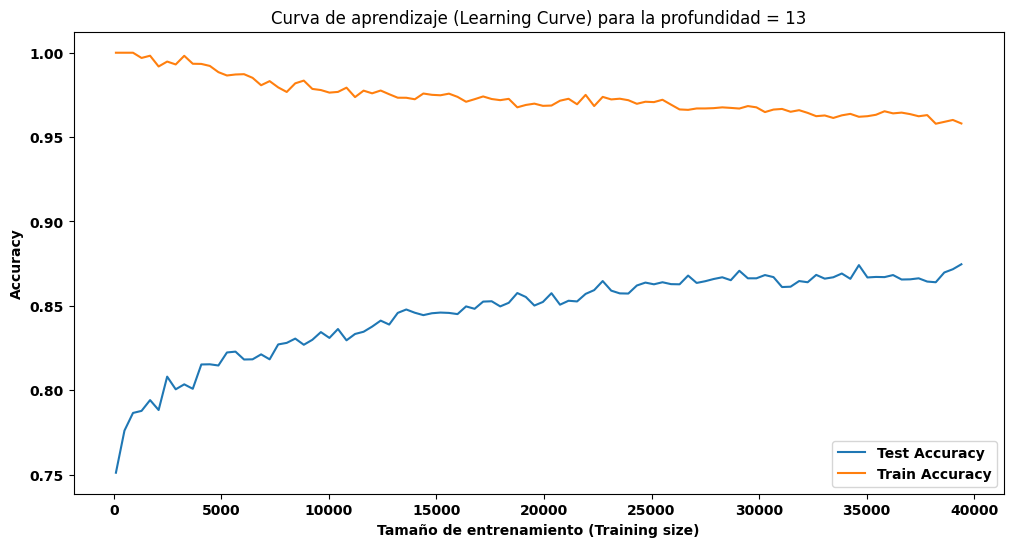

In [ ]:
## Solución
# Ejercicio 14.1.3
print(modelo_grid.best_estimator_)
curva_aprendizaje_arbol(13)

---

Los modelos de ***Decision Tree Classifires*** son capaces de encontrar la relación entre la variable objetivo y un conjunto de variables independientes (**poco sesgo/bias**). El mayor desventaja de éstos métodos es que **para tener una precisión aceptable suelen llegar a tener una *profundidad* considerable** que les expone al peligro de ***Overfitting*** y depender demasiado de los datos entrenados, de modo que al cambiar ligeramiente los datos de entrada, se obtengan resultados muy diversos (**mucha varianza**)

## Ensemble Learning

Los métodos de *ensamble de modelos* o el **aprendizaje conjunto** intentan combinar diferentes modelos de base para mejorar el rendimiento de los modelos de Machine Learning que pueden sufrir de tener errores en la predicción (bias) y confiabilidad de los resultados (varianza). En otras palabras, el *Enseble Learning* es el proceso de **entrenar múltiples modelos de aprendizaje automático y combinar sus resultados** para crear un modelo predictivo óptimo que tenga una mayor estabilidad y genere predicciones más precisas.

![1_ensemble-model.png](attachment:1_ensemble-model.png)

Existen diferentes enfoques para combinar los modelos de base (*base learners*) y generar un ensemble o un conjunto que sea mejor que cada uno de ellos. Los métodos de **Bagging** and **Boosting** son de los más utilizados:

![1_zTgGBTQIMlASWm5QuS2UpA.jpeg](attachment:1_zTgGBTQIMlASWm5QuS2UpA.jpeg)

- ### **Bagging**:
Este enfoque consiste en utilizar múltiples modelos de base que se entrenan en paralelo y cada uno por separado mediante un subconjunto de muestras seleccionadas aleatoriamente y con repeticiones del conjunto de datos de entrenamiento (***bootstrapping***). Después, se considera la media de todas las predicciones como el valor final (en caso de problemas de *Regresión*) o la clase más frecuente (en caso de problemas de *Clasificación*).

- ### **Boosting**:
La idea central detrás del enfoque de *boosting* es ajustar secuencialmente múltiples modelos sencillos (*weak learners*), donde cada modelo intenta mejorar o corregir los errores cometidos en el anterior. De este modo y con la implementación de varios modelos de forma secuencial, se puede conseguir una estabilidad mayor con resultados más precisos, tomando la combinación de todas las predicciones (*variables continuas*) o la clase más frecuente (*variables cualitativas/categóricas*) como la predicción final del ensemble.

## Clasificadores basados en Bosques aleatorios (_Random Forest Classifires_)

Un modelo de **bosque aleatorio** está formado por un conjunto de árboles de decisión, cada uno entrenado con un subconjunto distinto de datos extraídos de forma aleatoria de los datos de entrenamiento originales usando la técnica de ***bootstrapping***.  

Esto quiere decir que **cada árbol se entrena en paralelo con una muestra distinta** y el valor final de una nueva observación se calcula según **la clase más votada o la más frecuente entre todos los árboles** individuales que componen el bosque.

![image.png](attachment:image.png)

In [ ]:
# importamos el modelo de clasificación con bosques aleatorios
from sklearn.ensemble import RandomForestClassifier

bosque_clas = RandomForestClassifier(random_state=100)

# Ajustamos el algoritmo al conjunto de datos de entrenamiento
bosque_clas.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_bosque = bosque_clas.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_bosque)

0.9133082935742565

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bosque))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      2404
           1       0.92      0.97      0.94      7447

    accuracy                           0.91      9851
   macro avg       0.90      0.85      0.87      9851
weighted avg       0.91      0.91      0.91      9851



In [ ]:
# Calcular el área bajo la curva de funcionamiento del receptor
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_bosque)

0.8535062360816212

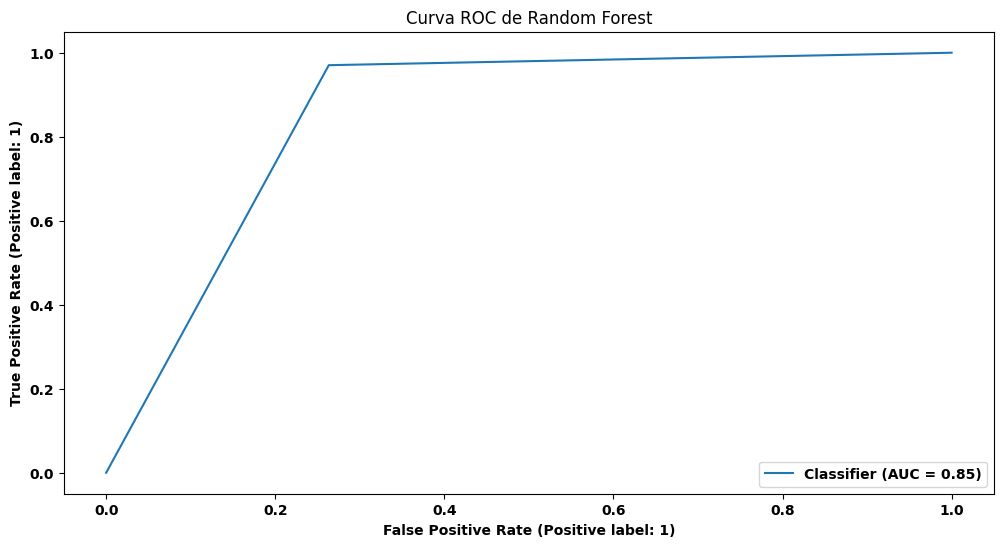

In [ ]:
# Graficar la curva ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_bosque)
plt.title("Curva ROC de Random Forest")
plt.show()

Vamos a obtener más información acerca del modelo:

In [ ]:
print("El número de los árboles que forman el bosque:", bosque_clas.n_estimators)

El número de los árboles que forman el bosque: 100


In [ ]:
# Parámetros indicados en la definición del bosque
bosque_clas.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Consultamos la profundidad del árbol visualizado dentro del bosque
bosque_clas.estimators_[62].get_depth()

25

In [ ]:
# Consultamos la profundidad de todos los 100 árboles del bosque (usando List Comprehension)
bosque_clas_profundidades = [arbol.get_depth() for arbol in bosque_clas.estimators_]
bosque_clas_profundidades

[33,
 27,
 27,
 25,
 23,
 30,
 25,
 27,
 25,
 24,
 27,
 25,
 24,
 29,
 25,
 27,
 25,
 26,
 29,
 29,
 25,
 26,
 25,
 26,
 27,
 25,
 24,
 27,
 29,
 27,
 26,
 25,
 26,
 29,
 28,
 27,
 27,
 27,
 28,
 29,
 26,
 24,
 27,
 26,
 25,
 27,
 31,
 28,
 29,
 26,
 26,
 25,
 27,
 25,
 26,
 27,
 28,
 24,
 27,
 29,
 27,
 25,
 25,
 26,
 31,
 26,
 31,
 24,
 27,
 28,
 26,
 25,
 27,
 30,
 25,
 29,
 25,
 27,
 28,
 28,
 28,
 25,
 28,
 25,
 26,
 33,
 30,
 27,
 26,
 30,
 28,
 26,
 23,
 29,
 30,
 26,
 30,
 28,
 25,
 25]

In [ ]:
# Revisamos las estadísticas de este dato
pd.Series(bosque_clas_profundidades).describe()

count    100.000000
mean      26.860000
std        2.045048
min       23.000000
25%       25.000000
50%       27.000000
75%       28.000000
max       33.000000
dtype: float64

Procedemos a generar otro bosque **con menos profundidad** en sus árboles:

In [ ]:
bosque2 = RandomForestClassifier(max_depth=4,
                                 n_jobs=-1,
                                 random_state=100)
bosque2.fit(X_train, y_train)
y_pred_bosque2 = bosque2.predict(X_test)

In [ ]:
# Consultamos el rendimiento del nuevo modelo
print("Accuracy: ", accuracy_score(y_test, y_pred_bosque2))
print("ROC AUC : ", roc_auc_score(y_test, y_pred_bosque2))


Accuracy:  0.8165668460054817
ROC AUC :  0.6427596669263684


In [ ]:
# Sacar diferentes parámetros del bosque que se ha entrenado
bosque2.__getstate__()

{'base_estimator': DecisionTreeClassifier(),
 'n_estimators': 100,
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_decrease',
  'random_state',
  'ccp_alpha'),
 'bootstrap': True,
 'oob_score': False,
 'n_jobs': -1,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False,
 'class_weight': None,
 'max_samples': None,
 'criterion': 'gini',
 'max_depth': 4,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['ALTITUD', 'Distancia_Pto_trafico1', 'Intensidad_Pto_trafico1',
        'Intensidad_Pto_trafico2', 'Intensidad_Pto_trafico3',
        'Intensidad_Pto_trafico4', 'Intensidad_Pto_trafico5',
        'Carga_Pto_trafico4', 'Carga_Pto_trafico3',
        'Intensidad_mediaR1_500', 'Intensidad_mediaR3_750_

El resultado se puede considerar como un modelo aceptable. Sin embargo, es evidente que para este tipo de modelos deberíamos de buscar la mejor combinación de los **hiperparámetros**.  

Antes de empezar a investigar los hiperparámetros vamos a revisar una métrica de calidad del modelo llamado **out-of-bag (OOB)** que hace referencia a una medida de error o precisión que se puede calcular para un modelo de *Random Forest* en el proceso de entrenamineto.

![image-11-921x1024.jpg](attachment:image-11-921x1024.jpg)

Ahora revisamos el **tamaño del bosque** o mejor dicho la cantidad de los árboles que le forman: ***n_estimators***

El mejor valor de n_estimator podría ser = 300  que consigue un Accuracy = 0.9156430819206172


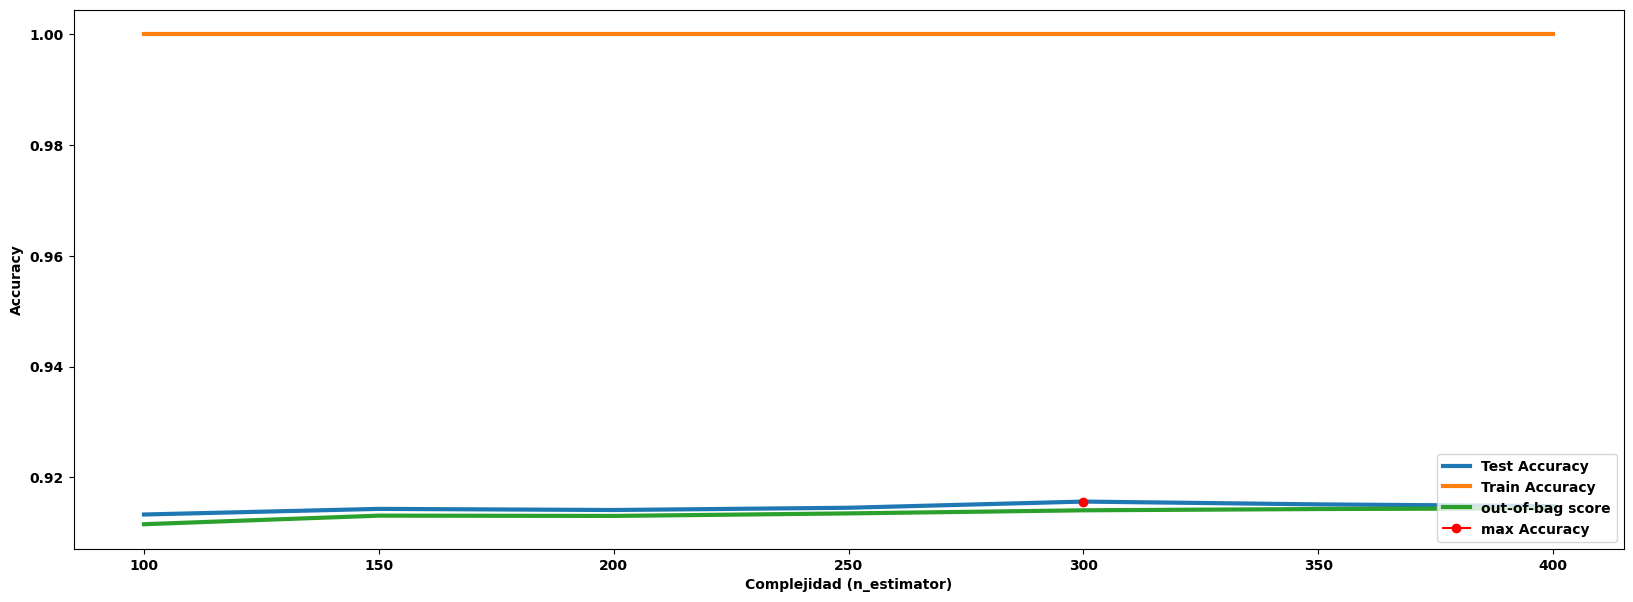

In [ ]:
# Consideramos un rango para asignar el hiperparámetro
hiper_param = np.arange(100,400+1,50)

# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento
train_score = np.zeros(hiper_param.size)
test_score = np.zeros(hiper_param.size)
oob_score = np.zeros(hiper_param.size)

for i in range(hiper_param.size):
    # Generamos un modelo para cada hiperparámetro, lo entrenamos y calculamos el rendimiento sobre datos de train y de test
    mod_bosque = RandomForestClassifier(n_estimators=hiper_param[i],
                                        n_jobs=-1,
                                        oob_score=True,
                                        random_state=100)
    mod_bosque.fit(X_train, y_train)
    train_score[i] = accuracy_score(y_train, mod_bosque.predict(X_train))
    test_score[i] = accuracy_score(y_test, mod_bosque.predict(X_test))
    oob_score[i] = mod_bosque.oob_score_

print("El mejor valor de n_estimator podría ser =", hiper_param[np.argmax(test_score)],
      " que consigue un Accuracy =", max(test_score))

# Graficamos el rendimiento de training versus de test
fig = plt.figure(figsize=(20,7))
plt.plot(hiper_param, test_score, linewidth=3, label='Test Accuracy')
plt.plot(hiper_param, train_score, linewidth=3, label='Train Accuracy')
plt.plot(hiper_param, oob_score, linewidth=3, label='out-of-bag score')
plt.plot(hiper_param[np.argmax(test_score)], max(test_score),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param)
plt.xlabel('Complejidad (n_estimator)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

Teniendo una idea sobre el número de los árboles podemos echar un vistazo a la profundidad de los árboles: ***max_depth***

El mejor valor de max_depth podría ser = 23  que consigue un Accuracy = 0.9156430819206172


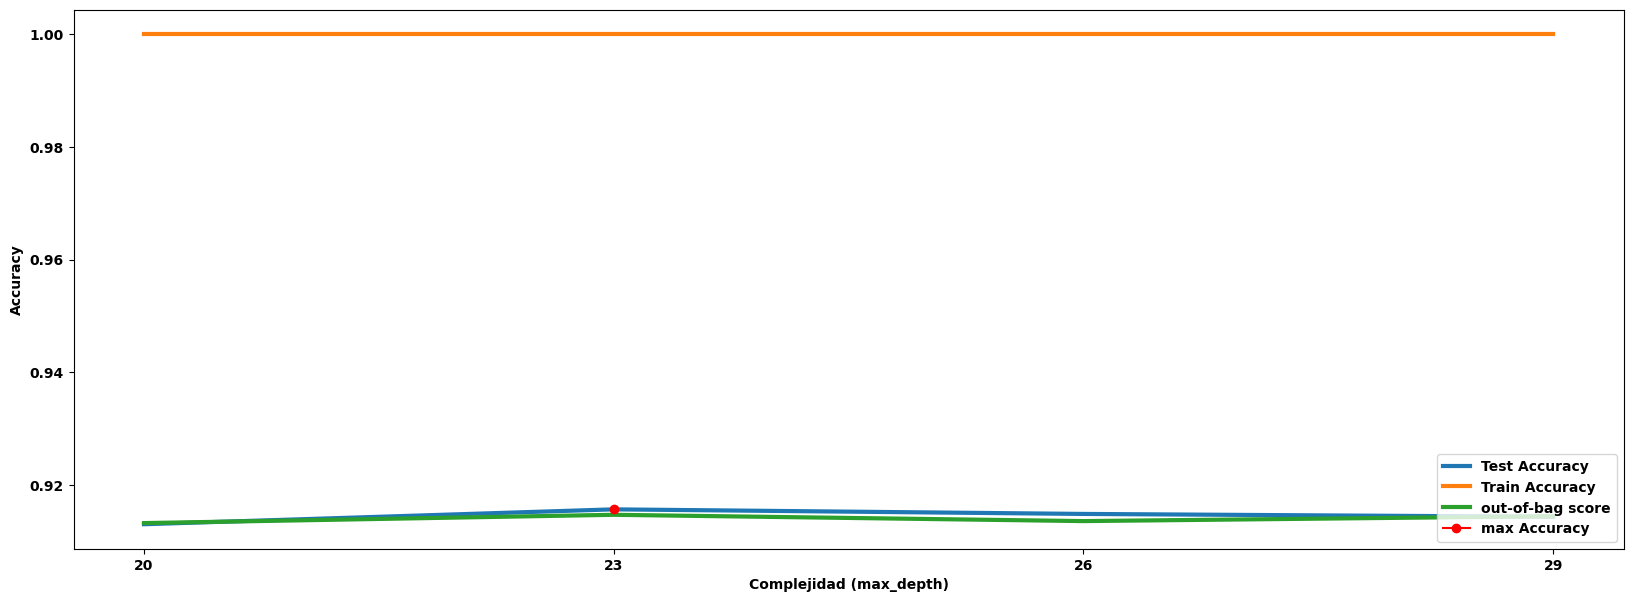

In [ ]:
# Consideramos un rango para asignar el hiperparámetro
hiper_param = np.arange(20,30+1,3)

# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento
train_score = np.zeros(hiper_param.size)
test_score = np.zeros(hiper_param.size)
oob_score = np.zeros(hiper_param.size)

for i in range(hiper_param.size):
    # Generamos un modelo para cada hiperparámetro, lo entrenamos y calculamos el rendimiento sobre datos de train y de test
    mod_bosque = RandomForestClassifier(max_depth=hiper_param[i],
                                       n_estimators=300,
                                       n_jobs=-1,
                                       oob_score=True,
                                       random_state=100)
    mod_bosque.fit(X_train, y_train)
    train_score[i] = accuracy_score(y_train, mod_bosque.predict(X_train))
    test_score[i] = accuracy_score(y_test, mod_bosque.predict(X_test))
    oob_score[i] = mod_bosque.oob_score_

print("El mejor valor de max_depth podría ser =", hiper_param[np.argmax(test_score)],
      " que consigue un Accuracy =", max(test_score))

# Graficamos el rendimiento de training versus de test
fig = plt.figure(figsize=(20,7))
plt.plot(hiper_param, test_score, linewidth=3, label='Test Accuracy')
plt.plot(hiper_param, train_score, linewidth=3, label='Train Accuracy')
plt.plot(hiper_param, oob_score, linewidth=3, label='out-of-bag score')
plt.plot(hiper_param[np.argmax(test_score)], max(test_score),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param)
plt.xlabel('Complejidad (max_depth)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()



Uno de los hiperparámetros más importantes y críticos sería el ***max_features***, que es el número de predictores considerados en cada bifurcación de los árboles y **determina cuánto se decorrelacionan los árboles entre sí**.

c:\Users\wonderwoman\anaconda3\envs\recomendadorVideos\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


El mejor valor de max_features podría ser = auto  que consigue un R2 = 0.9146765474710048


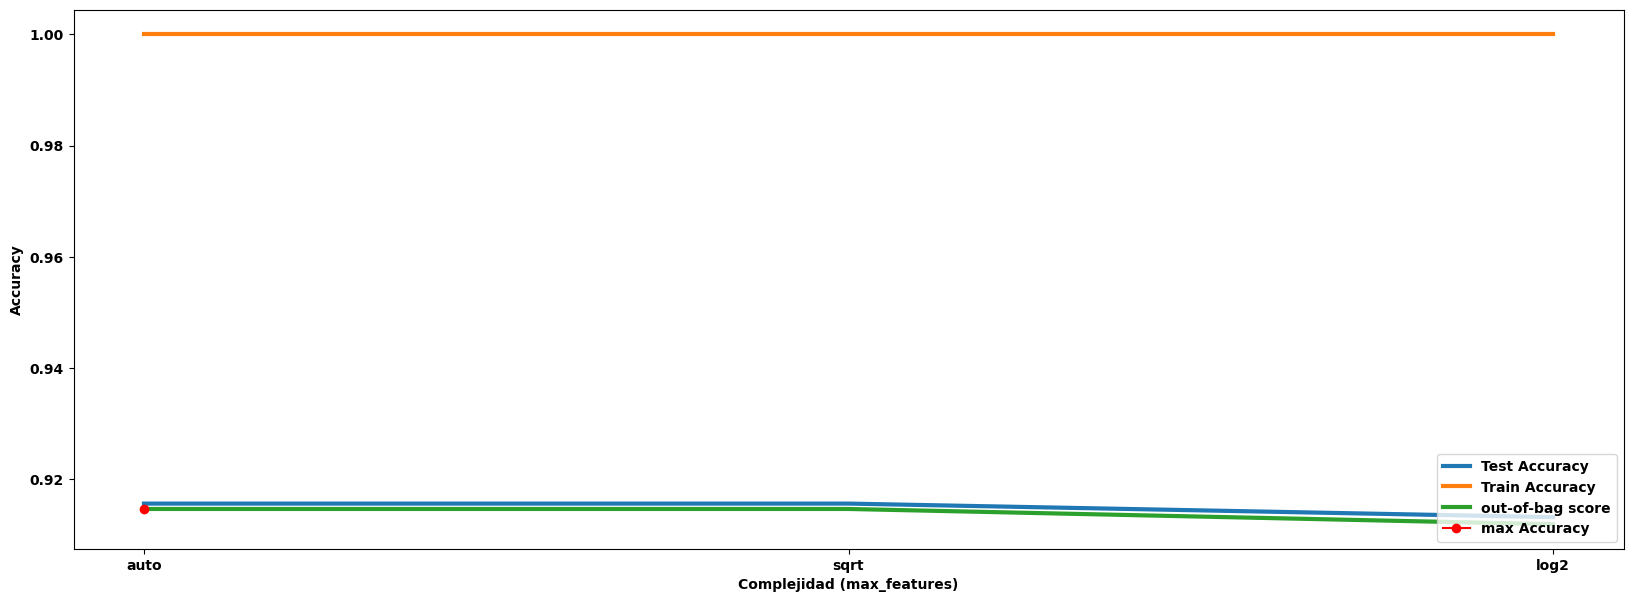

In [ ]:
# Consideramos un rango de valores válido para asignar el hiperparámetro
hiper_param = np.array(["auto", "sqrt", "log2"])

# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento
train_score = np.zeros(hiper_param.size)
test_score = np.zeros(hiper_param.size)
oob_score = np.zeros(hiper_param.size)

for i in range(hiper_param.size):
    # Generamos un modelo para cada hiperparámetro, lo entrenamos y calculamos el rendimiento sobre datos de train y de test
    mod_bosque = RandomForestClassifier(max_features=hiper_param[i],
                                        max_depth=23,
                                        n_estimators=300,
                                        n_jobs=-1,
                                        random_state=100,
                                        oob_score=True)
    mod_bosque.fit(X_train, y_train)
    train_score[i] = accuracy_score(y_train, mod_bosque.predict(X_train))
    test_score[i] = accuracy_score(y_test, mod_bosque.predict(X_test))
    oob_score[i] = mod_bosque.oob_score_

print("El mejor valor de max_features podría ser =", hiper_param[np.argmax(oob_score)],
      " que consigue un R2 =", max(oob_score))

# Graficamos el R_cuadrado de training versus de test
fig = plt.figure(figsize=(20,7))
plt.plot(hiper_param, test_score, linewidth=3, label='Test Accuracy')
plt.plot(hiper_param, train_score, linewidth=3, label='Train Accuracy')
plt.plot(hiper_param, oob_score, linewidth=3, label='out-of-bag score')
plt.plot(hiper_param[np.argmax(oob_score)], max(oob_score),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param)
plt.xlabel('Complejidad (max_features)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()



__`'auto'`__ es el valor por defecto, que suele ser la mejor opción sobre todo en caso de disponer de un número grande de variables de entrada.

In [ ]:
bosque_opt = RandomForestClassifier(max_depth=23,
                                    n_estimators=300,
                                    n_jobs=-1,
                                    random_state=100,
                                    oob_score=True)
bosque_opt.fit(X_train, y_train)
y_pred_bosque_opt = bosque_opt.predict(X_test)

In [ ]:
# Consultamos el rendimiento del nuevo modelo
print("Accuracy: ", accuracy_score(y_test, y_pred_bosque_opt))
print("ROC AUC : ", roc_auc_score(y_test, y_pred_bosque_opt))
print("OOB (out-of-bag score) : ", bosque_opt.oob_score_)



Accuracy:  0.9156430819206172
ROC AUC :  0.856036400994091
OOB (out-of-bag score) :  0.9146765474710048


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_bosque_opt))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      2404
           1       0.92      0.97      0.95      7447

    accuracy                           0.92      9851
   macro avg       0.91      0.86      0.88      9851
weighted avg       0.91      0.92      0.91      9851



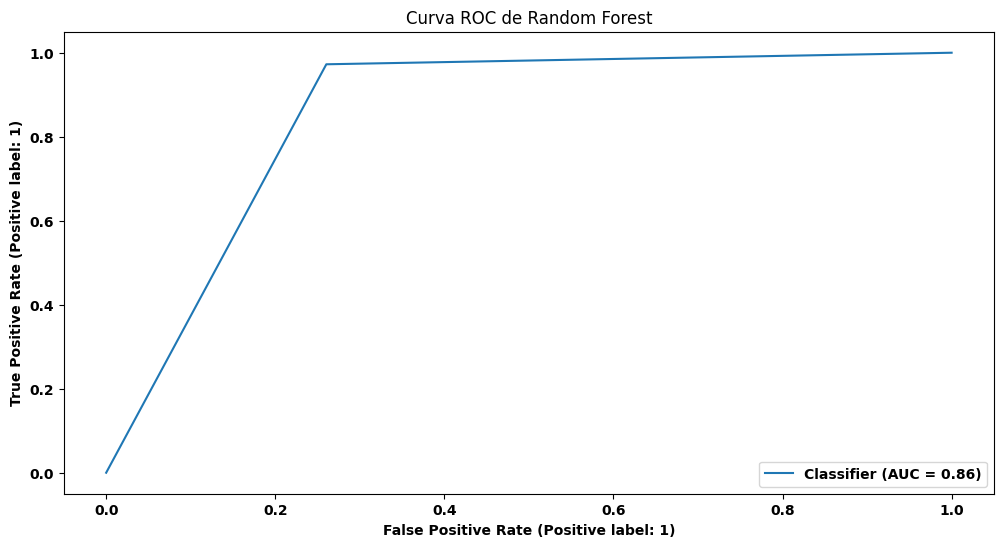

In [ ]:
# Graficar la curva ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_bosque_opt)
plt.title("Curva ROC de Random Forest")
plt.show()

---

### **`Ejercicio 14.2`**

**`14.2.1`** Define con funciones de _numpy_ los rangos indicados y realiza una búsqueda del bosque óptimo usando la técnica de *Grid Search* para la validación cruzada tipo **`5-fold-CV`**. Después, compáralos con los valores sugeridos anteriormente en la sesión.

HACER CON FUNCION DE NUMPY
-             parametros={'n_estimators': [150, 200, 250, 300, 350],
                          'max_depth': [20, 25, 30]}
- para `KFold`  >>> `n_splits=5` y `random_state=111`  
- para `GridSearchCV`  >>> `random_state=100`
- para scoring:  `el área bajo la curva de funcionamiento del receptor`


**`14.2.2`** Calcula diferentes métricas para evaluar tu modelo óptimo que se ha conseguido mediante el _grid search_ y analiza su rendimiendo en comparación con modelos anteriores.
- Accuracy
- Classification report
- Confusion matrix
- AUC
- ROC (Curve)

**`14.2.3`** Saca la gráfica del *Learning Curve* para el modelo óptimo y el resto de los bosques desarrollados en la sesión, definiendo y aplicando una función nueva considerando los siguientes puntos y explica si este modelo tiene un buen rendimiento comparando con modelos anteriores:
- Incluye la métrica de `OOB score`
- Indica `random_state=100`
- (*Sugerencia*: No incluye más de 20 puntos en el eje horizontal y empieza la gráfica con un mínimo de _100_ muestras para el modelo)

In [ ]:
## Solución
# Ejercicio 14.2.1
n_stimators=np.arange(150,351,50)
max_depth=np.arange(20,31,5)
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# Definimos la menra de trozear dataset de train para crear los subconjuntos que se utilizan en la validación cruzada (Cross-Validation)
folds = KFold(n_splits=5, shuffle=True, random_state=111)

# Declaramos el tipo de regresor (modelo) y los rangos de hiperparámetros a considerar en la búsqueda
modelo = RandomForestClassifier(random_state=100)
parametros ={'max_depth':max_depth,
                          'n_estimators': n_stimators}
# Establecer el R_cuadrado como la función de "scoring" a la hora de puntuar los modelos
scoreFun = make_scorer(roc_auc_score)

# Definir el Grid Search y realizar la búsqueda con los datos de entrenamiento
modelo_grid = GridSearchCV(estimator=modelo,
                          param_grid=parametros,
                          scoring=scoreFun,
                          cv=folds,
                          n_jobs=-1)
modelo_grid.fit(X_train, y_train)
modelo_grid.best_estimator_

RandomForestClassifier(max_depth=25, n_estimators=150, random_state=100)

Acurrenci Score
AU
Confusion Matrix


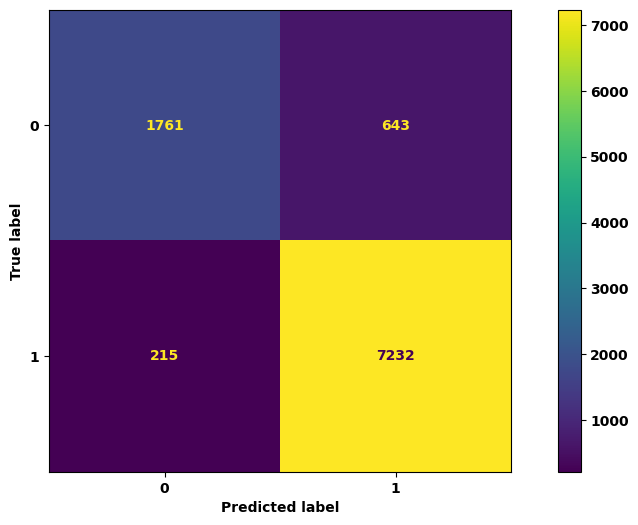

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      2404
           1       0.92      0.97      0.94      7447

    accuracy                           0.91      9851
   macro avg       0.90      0.85      0.87      9851
weighted avg       0.91      0.91      0.91      9851

Curve


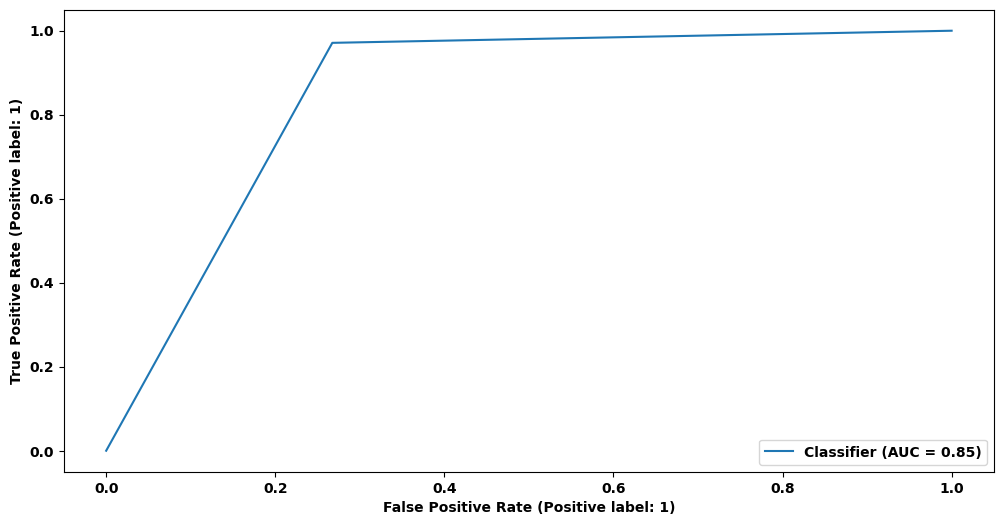

In [ ]:
## Solución
# Ejercicio 14.2.2
y_pred=modelo_grid.predict(X_test)
print("Acurrenci Score" )
accuracy_score(y_test,y_pred)
print("AU")
roc_auc_score(y_test, y_pred)
print("Confusion Matrix")
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=modelo_grid.classes_)
disp.plot()
plt.show()
print("Classification Report")
print(classification_report(y_test, y_pred))
print("Curve")
RocCurveDisplay.from_predictions(y_test, y_pred)

plt.show()

La diferencia de R^2 entre training y OOB es=  0.08342004415907422


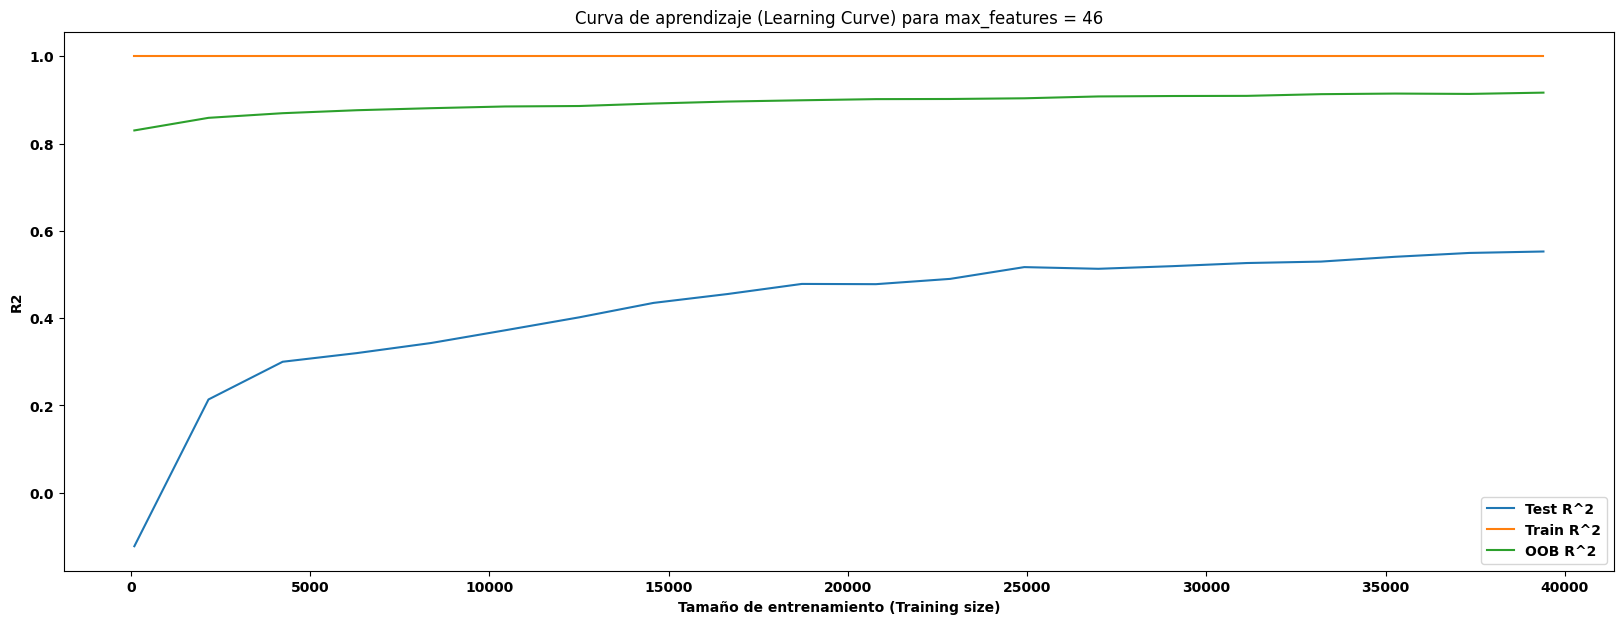

La diferencia de R^2 entre training y OOB es=  0.08227799913712153


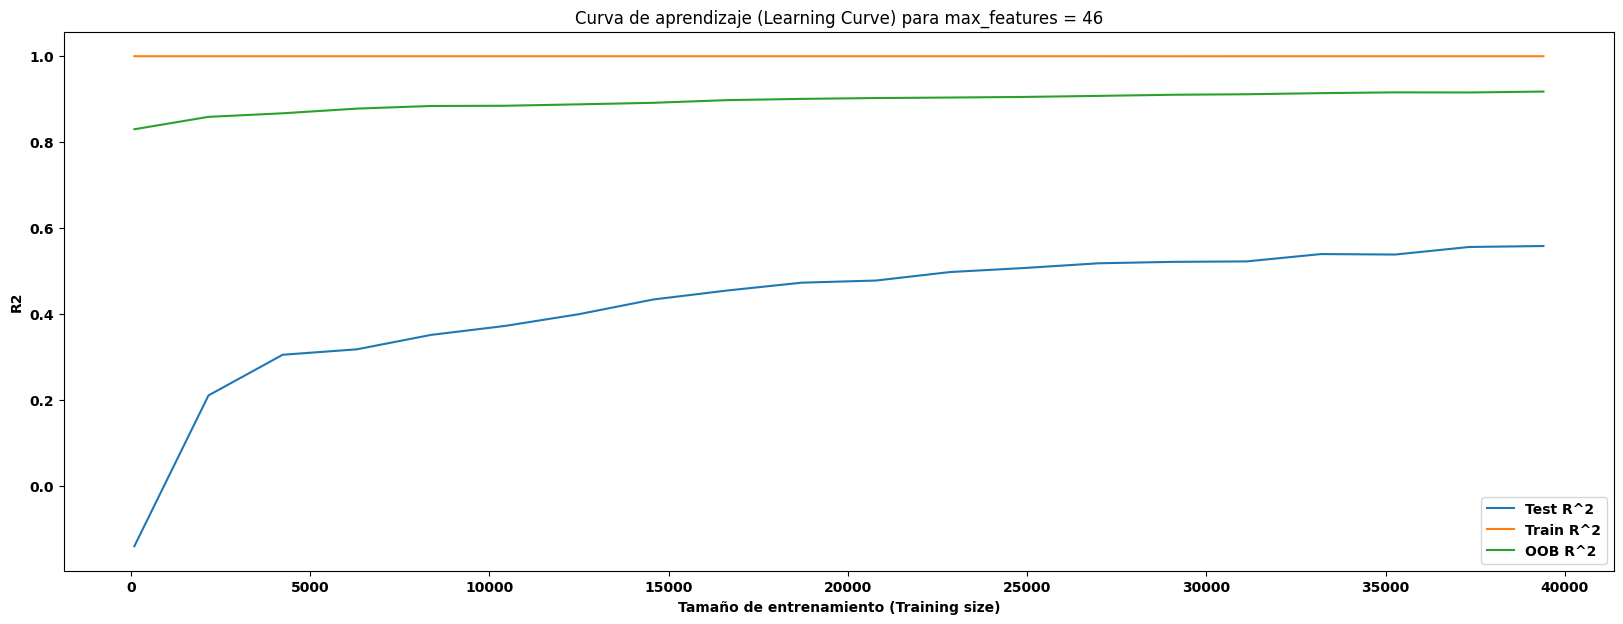

La diferencia de R^2 entre training y OOB es=  -0.7071535706089073


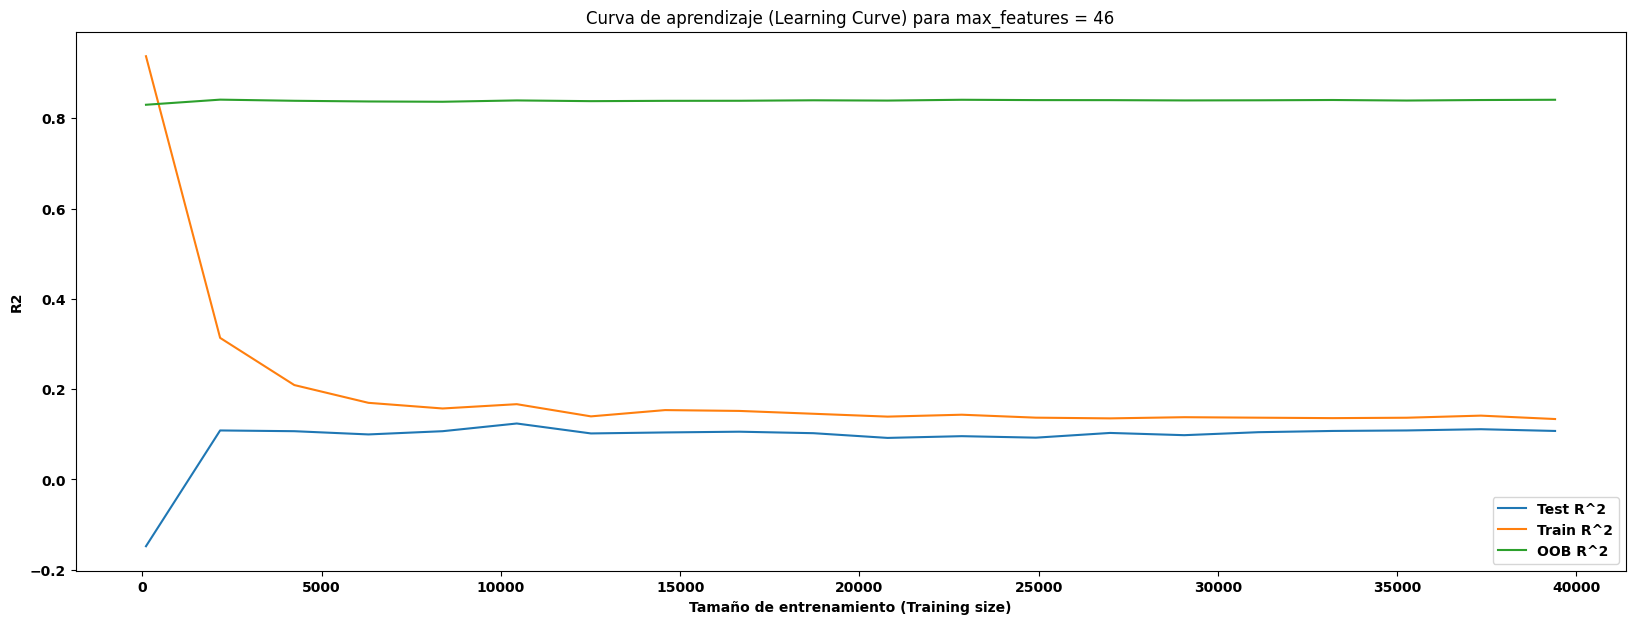

In [ ]:
#Ejercicio 14.2.3
def curva_aprendizaje_rf(n_arboles: int,
                         profundidad: int,
                         n_var: int):
    """Función para sacar la gráfica de Learning Curve a partir de los hiperparámetros del bosque"""

    # Generar la estructura del modelo
    modelo_bosque = RandomForestClassifier(n_estimators=int(n_arboles),
                                          max_depth=int(profundidad),
                                          max_features=int(n_var),
                                          oob_score=True,
                                          n_jobs=-1,
                                          random_state=100)

    # Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
    num_samples = np.linspace(100,X_train.shape[0],20).astype(int)

    # Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los modelos
    train_R2 = np.zeros(num_samples.size)
    test_R2 = np.zeros(num_samples.size)
    oob_score = np.zeros(num_samples.size)

    for i in range(num_samples.size):
        # Generamos un modelo para cada subconjunto de datos de entrenamiento y lo ajustamos
        modelo_bosque.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

        # Calculamos el R_cuadrado sobre datos de train y de test
        train_R2[i] = r2_score(y_train[:num_samples[i]], modelo_bosque.predict(X_train[:num_samples[i]]))
        test_R2[i] = r2_score(y_test, modelo_bosque.predict(X_test))
        oob_score[i] = modelo_bosque.oob_score_

    print("La diferencia de R^2 entre training y OOB es= ", train_R2[-1]-oob_score[-1])

    # Graficamos el R_cuadrado de training versus de test
    fig = plt.figure(figsize=(20,7))
    plt.plot(num_samples, test_R2, label = 'Test R^2')
    plt.plot(num_samples, train_R2, label = 'Train R^2')
    plt.plot(num_samples, oob_score, label = 'OOB R^2')
    plt.title('Curva de aprendizaje (Learning Curve) para max_features = %s' % n_var)
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('R2')
    plt.legend(loc = 'lower right')
    plt.show()
curva_aprendizaje_rf(n_arboles=150,
                     profundidad=25,
                     n_var=46)
curva_aprendizaje_rf(n_arboles=300,
                     profundidad=23,
                     n_var=46)
curva_aprendizaje_rf(n_arboles=300,
                     profundidad=4,
                     n_var=46)

Yo pienso que si podria llegar a tener preferencia respecto a otros modelos ya que su rendimiento es mayor,como podemos ver en las graficas.

---

## Gradient Boosting

Los modelos Gradient Boosting están formados por un conjunto de árboles de decisión individuales, entrenados de forma secuencial, de forma que **cada nuevo árbol trata de mejorar los errores de los árboles anteriores**. La predicción de una nueva observación se obtiene agregando las predicciones de todos los árboles individuales que forman el modelo.

**Boosting es otra estrategia de ensemble** que se puede emplear con un amplio grupo de métodos de statistical learning, entre ellos los árboles de decisión.

La idea detrás del boosting es ajustar, de forma secuencial, **múltiples weak learners (modelos sencillos que predicen solo ligeramente mejor que lo esperado por azar)**. Cada nuevo modelo emplea información del modelo anterior para aprender de sus errores, mejorando iteración a iteración.

En el caso de los árboles de predicción, un weak learners se consigue utilizando árboles con muy **pocas ramificaciones**. A diferencia del método de bagging (random forest), el boosting no hace uso de muestreo repetido (bootstrapping), la diferencia entre los árboles que forman el ensemble se origina por que **la importancia (peso) de las observaciones va cambiando en cada iteración**.

Tres de los algoritmos de boosting más empleados son **AdaBoost**, **Gradient Boosting** y **Stochastic Gradient Boosting**.

![Ensemble-algorithms-boosting.jpg](attachment:Ensemble-algorithms-boosting.jpg)

# XGBoost

[XGBoost](https://xgboost.ai/) (**Extreme Gradient Boosting**) es un algoritmo predictivo supervisado que utiliza el principio de boosting.

Para conseguir un modelo más fuerte que se copone por el conjunto de modelos débiles, **se emplea un algoritmo de optimización**, este caso **Gradient Descent (descenso de gradiente)**.
Durante el entrenamiento, los parámetros de cada modelo débil son ajustados iterativamente tratando de encontrar el mínimo de una función objetivo, que puede ser la proporción de error en la clasificación, el área bajo la curva (AUC), la raíz del error cuadrático medio (RMSE) o alguna otra.

Cada modelo es comparado con el anterior. Si un nuevo modelo tiene mejores resultados, entonces se toma este como base para realizar nuevas modificaciones. Si, por el contrario, tiene peores resultados, se regresa al mejor modelo anterior y se modifica ese de una manera diferente.

Este proceso se repite **hasta llegar a un punto en el que la diferencia entre modelos consecutivos es insignificante**, lo cual nos indica que hemos encontrado el mejor modelo posible, o cuando **se llega al número de iteraciones máximas** definido por el usuario.

Instalamos esta librería en el kernel de la sesión:

In [ ]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Importamos la librería instalada
from xgboost import XGBClassifier

In [ ]:
# LLamar al modelo, entrenarlo y sacar los valores predichos
modelo_xgb = XGBClassifier()
modelo_xgb.fit(X_train, y_train)
y_pred_xgb = modelo_xgb.predict(X_test)

In [ ]:
# Consultamos el rendimiento del nuevo modelo
print("Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC : ", roc_auc_score(y_test, y_pred_xgb))



Accuracy:  0.9299563496091767
ROC AUC :  0.8935315664975365


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      2404
           1       0.94      0.96      0.95      7447

    accuracy                           0.93      9851
   macro avg       0.91      0.89      0.90      9851
weighted avg       0.93      0.93      0.93      9851



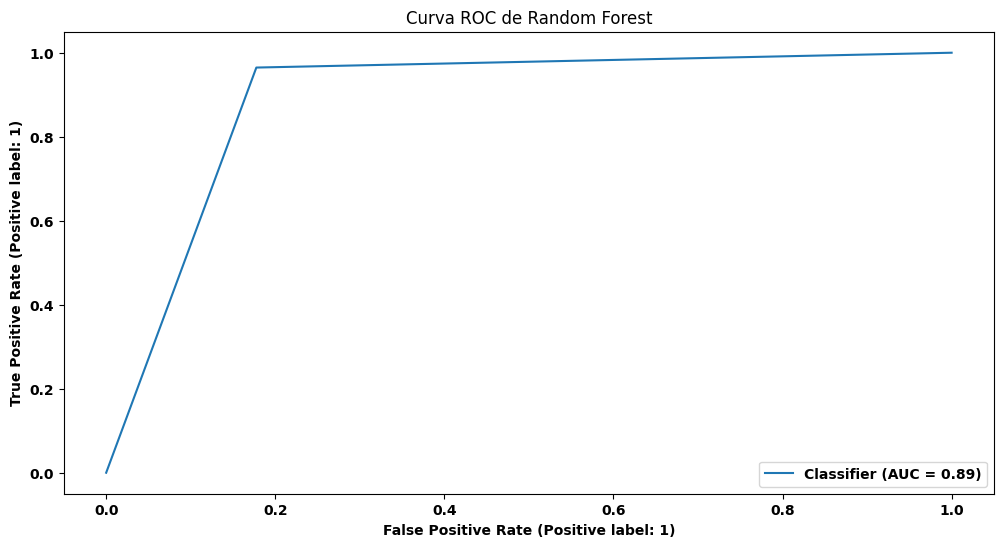

In [ ]:
# Graficar la curva ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred_xgb)
plt.title("Curva ROC de Random Forest")
plt.show()

---

### **`Ejercicio 14.3`**

- Saca la gráfica del ***Learning Curve*** para este modelo considerando los siguientes puntos y explica si este modelo tiene un buen rendimiento y preferencia respecto ma otros, comparandolo con modelos anteriores:

    - (*Sugerencia*: No incluye más de 20 puntos en el eje horizontal y empieza la gráfica con un mínimo de _100_ muestras para el modelo)

La diferencia final del rendimiento del modelo entre training y test es=  0.046898204612583094


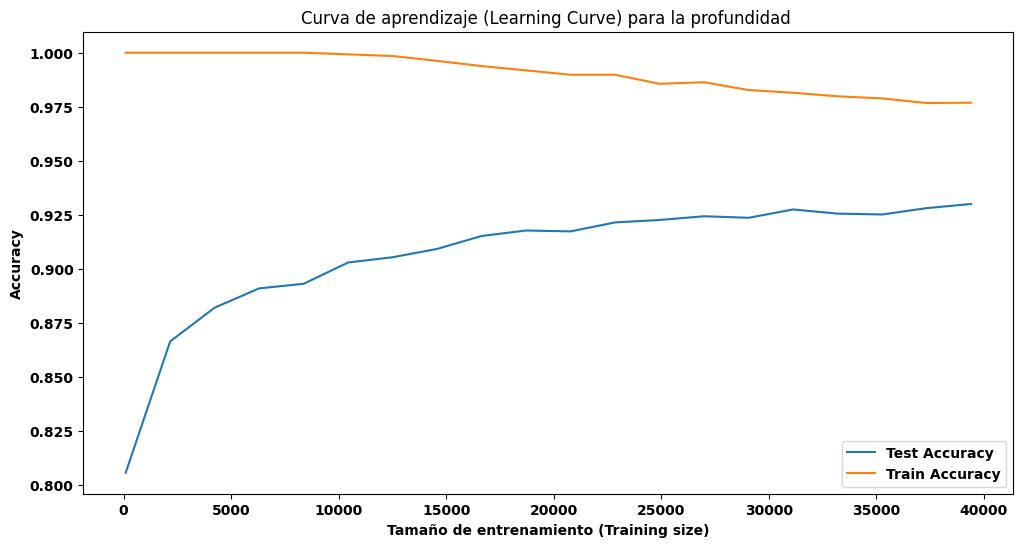

In [ ]:
## Solución
# Ejercicio 14.3


    # Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
num_samples = np.linspace(100,X_train.shape[0],20).astype(int)

    # Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los árboles
train_score = np.zeros(num_samples.size)
test_score = np.zeros(num_samples.size)

for i in range(num_samples.size):
    # Generamos un árbol para cada subconjunto de datos de entrenamiento y lo ajustamos
    modelo_xgb.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

    # Calculamos el área bajo la curva de funcionamiento del receptor sobre datos de train y de test
    train_score[i] = accuracy_score(y_train[:num_samples[i]], modelo_xgb.predict(X_train[:num_samples[i]]))
    test_score[i] = accuracy_score(y_test, modelo_xgb.predict(X_test))

print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

# Graficamos el rendimiento de training versus de test
plt.plot(num_samples, test_score, label = 'Test Accuracy')
plt.plot(num_samples, train_score, label = 'Train Accuracy')
plt.title('Curva de aprendizaje (Learning Curve) para la profundidad ')
plt.xlabel('Tamaño de entrenamiento (Training size)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()


Yo pienso que si tendria preferencia respecto a los modelos anteriores ya que si las lineas se extienden se puede ver que al final pueden llegar a juntarse.